# EDA

## Навигация

- [Анализ пропусков](#Анализ-пропусков)
- [Анализ распределений](#Анализ-распределений)
   - [ar](#ar)
   - [ab](#ab)
   - [age](#age)
   - [ul](#ul)
- [Корреляции](#Корреляции)

- [Модельки](#Модельки)

In [1]:
import sys
sys.path.append('..')
import os

from fast_ml.feature_selection import get_constant_features
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import phik
from phik.report import plot_correlation_matrix
import seaborn as sns

from my_ds_tools.eda import cat_feature_report
from my_ds_tools.eda import num_feature_report

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [86]:
DATA_PATH = os.path.join('..', 'data', 'PD-data-train.csv')
DESCRIPTION = os.path.join('..', 'data', 'PD-data-desc.csv')

RANDOM_STATE = 42
N_TRIALS = 100
N_SPLITS = 10

In [3]:
desc = pd.read_csv(DESCRIPTION, sep=';')
desc

field  \
0                     ar_revenue   
1              ar_total_expenses   
2                   ar_sale_cost   
3            ar_selling_expenses   
4         ar_management_expenses   
5                 ar_sale_profit   
6   ar_balance_of_rvns_and_expns   
7           ar_profit_before_tax   
8                       ar_taxes   
9     ar_other_profit_and_losses   
10                 ar_net_profit   
11         ab_immobilized_assets   
12      ab_mobile_current_assets   
13                  ab_inventory   
14        ab_accounts_receivable   
15       ab_other_current_assets   
16        ab_cash_and_securities   
17                     ab_losses   
18                ab_own_capital   
19           ab_borrowed_capital   
20      ab_long_term_liabilities   
21       ab_short_term_borrowing   
22           ab_accounts_payable   
23           ab_other_borrowings   
24                       bus_age   
25                      ogrn_age   
26                adr_actual_age   
27               head_actual_age   
28                cap_actual_age   
29                ul_staff_range   
30                ul_capital_sum   
31               ul_founders_cnt   
32                 ul_branch_cnt   
33              ul_strategic_flg   
34          ul_systematizing_flg   

                                                        desc_eng  \
0                    Sales revenue (at the end of the last year)   
1                               Total expenses for the last year   
2                    Cost of sales (at the end of the last year)   
3                 Selling expenses (at the end of the last year)   
4          Administrative expenses (at the end of the last year)   
5                Profit from sales (at the end of the last year)   
6   Balance of income and expenses (at the end of the last year)   
7                                Gross Profit (end of last year)   
8               Current income tax (at the end of the last year)   
9        Other income and expenses (at the end of the last year)   
10                      Net profit (at the end of the last year)   
11                                Fixed assets for the last year   
12                  Current assets (at the end of the last year)   
13                          Stocks (at the end of the last year)   
14             Accounts receivable (at the end of the last year)   
15            Other current assets (at the end of the last year)   
16       Cash and cash equivalents (at the end of the last year)   
17               Retained earnings (at the end of the last year)   
18                         Capital (at the end of the last year)   
19                                 Total debt (end of last year)   
20           Long-term liabilities (at the end of the last year)   
21       Short-term borrowed funds (at the end of the last year)   
22                            Accounts payable for the last year   
23               Other liabilities (at the end of the last year)   
24                                             Business duration   
25                    Term from the moment the PSRN was assigned   
26       Term from the date of registration of the legal address   
27                        Term since the appointment of the head   
28                  Term from the moment of capital installation   
29                                       The number of employees   
30                                                Capital amount   
31                                        Number of shareholders   
32                                            Number of branches   
33                             A company of strategic importance   
34                                              Backbone company   

                                                               desc_rus  
0                      Выручка от реализации (на конец последнего года)  
1                                        Общие расходы за последний год  
2                       Себестоимость продаж (на конец посл

In [4]:
data = pd.read_csv(DATA_PATH, sep=';', index_col='record_id')
data.head()

ar_revenue  ar_total_expenses  ar_sale_cost  ar_selling_expenses  \
record_id                                                                     
7          52996000.0         48344000.0    48344000.0                  0.0   
13                NaN                NaN           NaN                  NaN   
18                NaN                NaN           NaN                  NaN   
22         32049000.0         29568000.0    29568000.0                  0.0   
23         16458000.0         14935000.0    14935000.0                  0.0   

           ar_management_expenses  ar_sale_profit  \
record_id                                           
7                             0.0       4652000.0   
13                            NaN             NaN   
18                            NaN             NaN   
22                            0.0       2481000.0   
23                            0.0       1523000.0   

           ar_balance_of_rvns_and_expns  ar_profit_before_tax  ar_taxes  \
record_id                                                                 
7                            -2608000.0             2044000.0  846000.0   
13                                  NaN                   NaN       NaN   
18                                  NaN                   NaN       NaN   
22                            -260000.0             2221000.0  302000.0   
23                            -274000.0             1249000.0  538000.0   

           ar_other_profit_and_losses  ar_net_profit  ab_immobilized_assets  \
record_id                                                                     
7                                 0.0      1198000.0                    0.0   
13                                NaN            NaN                    NaN   
18                                NaN            NaN                    NaN   
22                                0.0      1919000.0                    0.0   
23                                0.0       711000.0                    0.0   

           ab_mobile_current_assets  ab_inventory  ab_accounts_receivable  \
record_id                                                                   
7                         7240000.0     4988000.0               2252000.0   
13                              NaN           NaN                     NaN   
18                              NaN           NaN                     NaN   
22                        4245000.0     4082000.0                163000.0   
23                        8950000.0     8606000.0                344000.0   

           ab_other_current_assets  ab_cash_and_securities  ab_losses  \
record_id                                                               
7                              0.0                255000.0  1198000.0   
13                             NaN                     NaN        NaN   
18                             NaN                     NaN        NaN   
22                             0.0                 25000.0  1919000.0   
23                             0.0                492000.0   711000.0   

           ab_own_capital  ab_borrowed_capital  ab_long_term_liabilities  \
record_id                                                                  
7                663000.0           15872000.0                       0.0   
13                    NaN                  NaN                       NaN   
18                    NaN                  NaN                       NaN   
22              2219000.0            3652000.0                       0.0   
23             12439000.0            1279000.0                       0.0   

           ab_short_term_borrowing  ab_accounts_payable  ab_other_borrowings  \
record_id                                                                      
7                       11349000.0            4523000.0                  0.0   
13                             NaN                  NaN                  NaN   
18                             NaN                  NaN                  NaN   
22                  

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32395 entries, 7 to 274623
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ar_revenue                    17250 non-null  float64
 1   ar_total_expenses             17250 non-null  float64
 2   ar_sale_cost                  17250 non-null  float64
 3   ar_selling_expenses           17250 non-null  float64
 4   ar_management_expenses        17250 non-null  float64
 5   ar_sale_profit                17250 non-null  float64
 6   ar_balance_of_rvns_and_expns  17250 non-null  float64
 7   ar_profit_before_tax          17250 non-null  float64
 8   ar_taxes                      17250 non-null  float64
 9   ar_other_profit_and_losses    17250 non-null  float64
 10  ar_net_profit                 17250 non-null  float64
 11  ab_immobilized_assets         17250 non-null  float64
 12  ab_mobile_current_assets      17250 non-null  float64
 13  ab_in

In [6]:
get_constant_features(data.drop(columns='default_12m'), threshold=.5)

Desc                   Var    Value        Perc
0        Constant  ul_systematizing_flg        0  100.000000
1  Quasi Constant      ul_strategic_flg        0   99.990739
2  Quasi Constant         ul_branch_cnt        0   98.999846
3  Quasi Constant        ul_staff_range  [1-100]   90.387405
4  Quasi Constant       ul_founders_cnt        1   60.114215
5  Quasi Constant        ul_capital_sum  10000.0   56.308072

## Анализ пропусков

[к навигации](#Навигация)

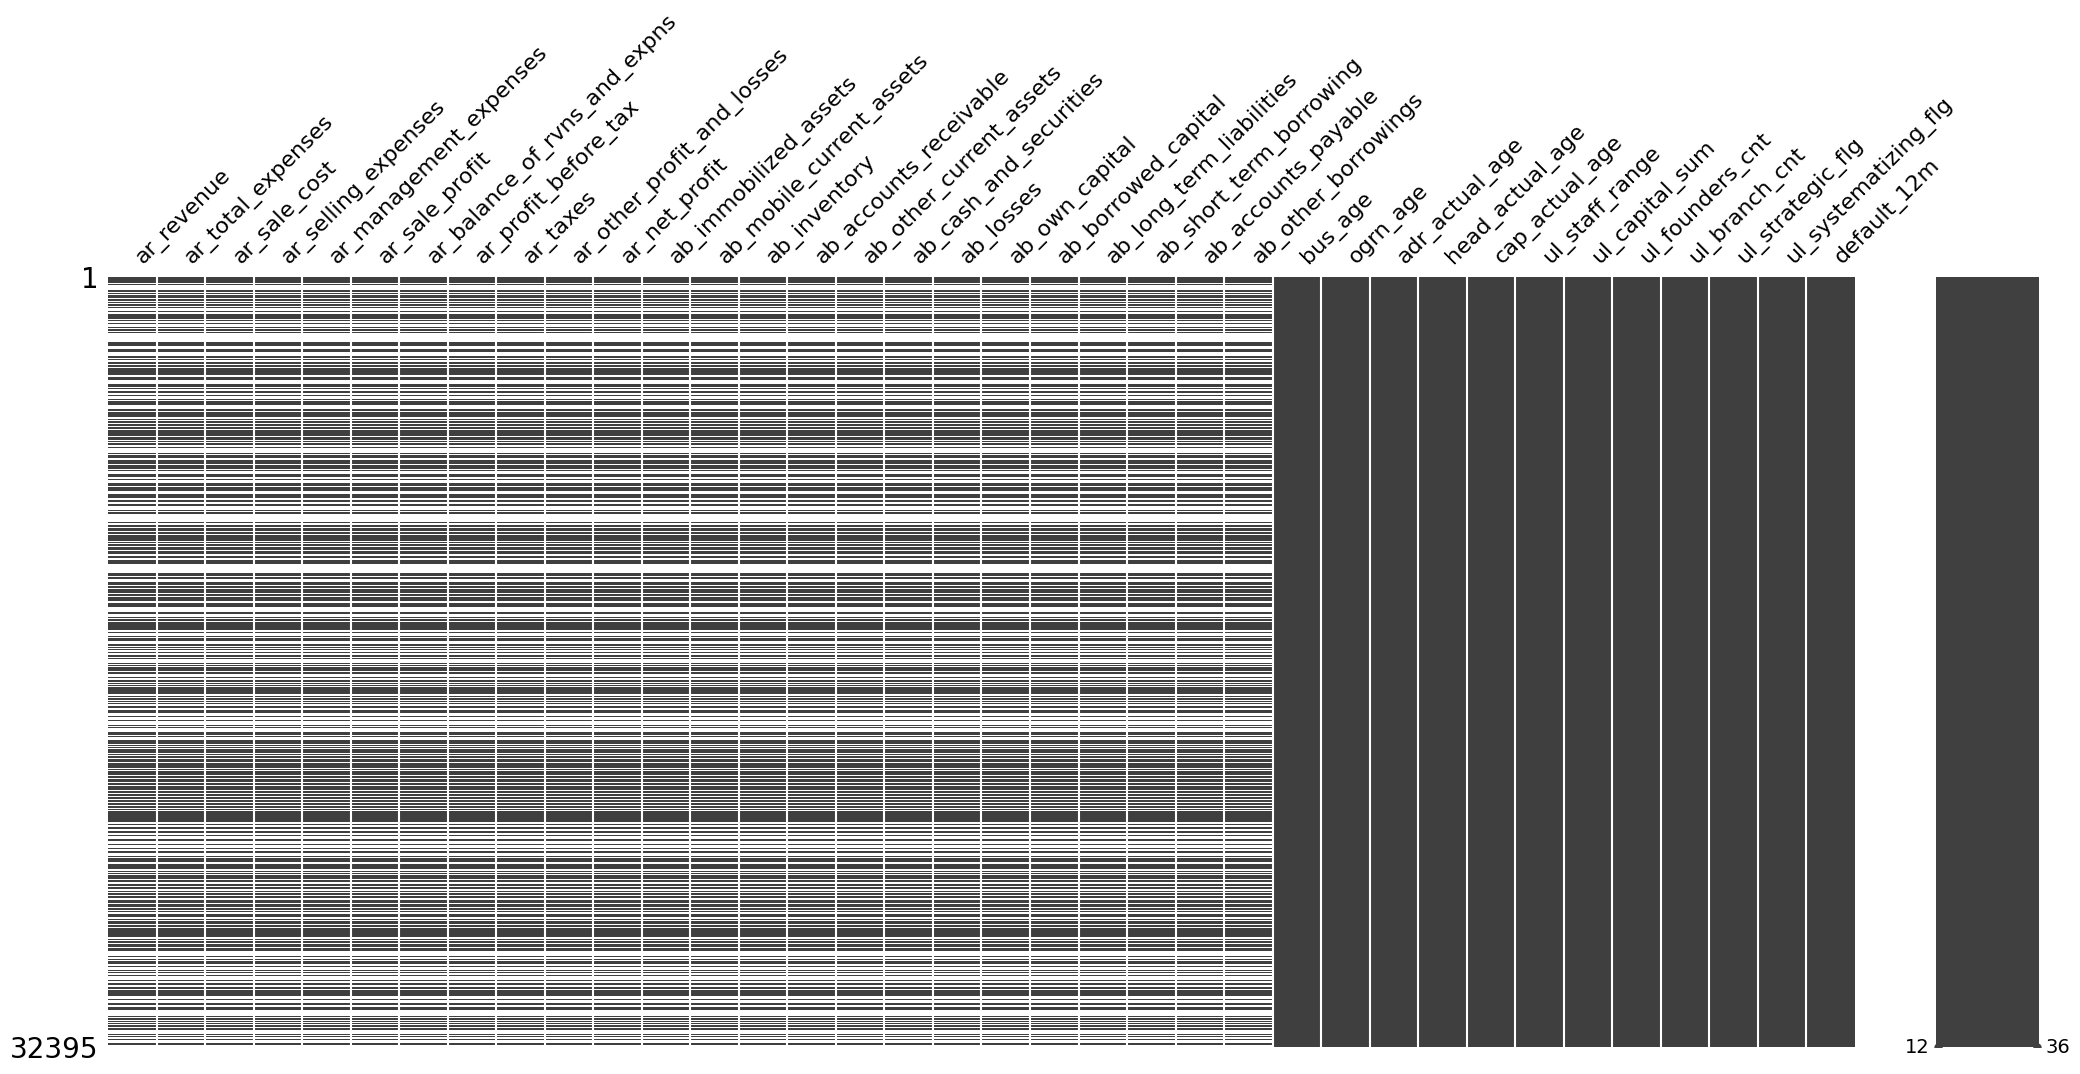

In [7]:
ax = msno.matrix(data)

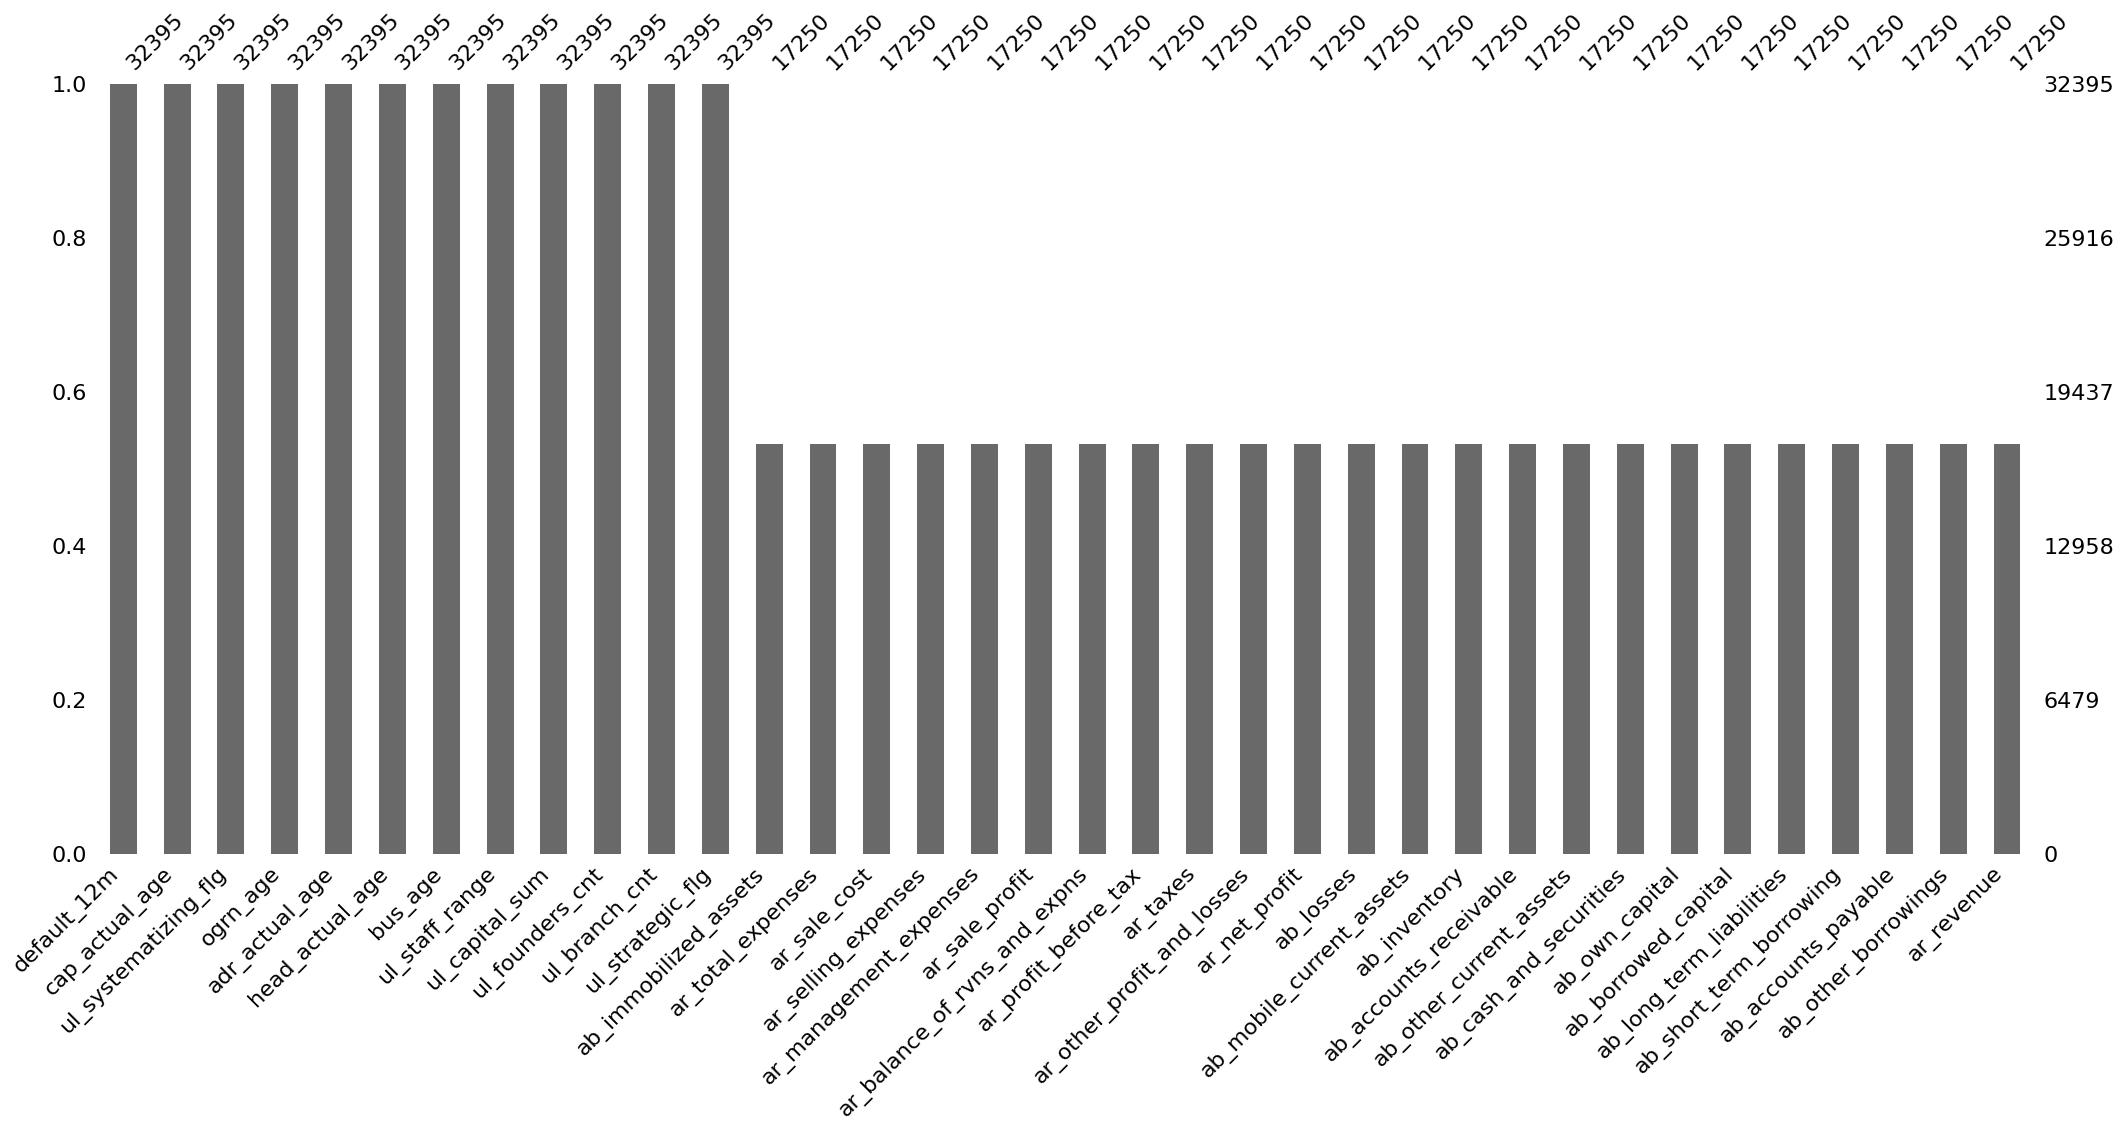

In [8]:
ax = msno.bar(data, sort='descending')

**Вывод:** в группах признаков `ar` и `ab` наблюдаются пропуски, причём в одних и тех же примерах.

## Анализ распределений

[к навигации](#Навигация)

### ar

[к навигации](#Навигация)

#### `ar_revenue` - Выручка от реализации (на конец последнего года)

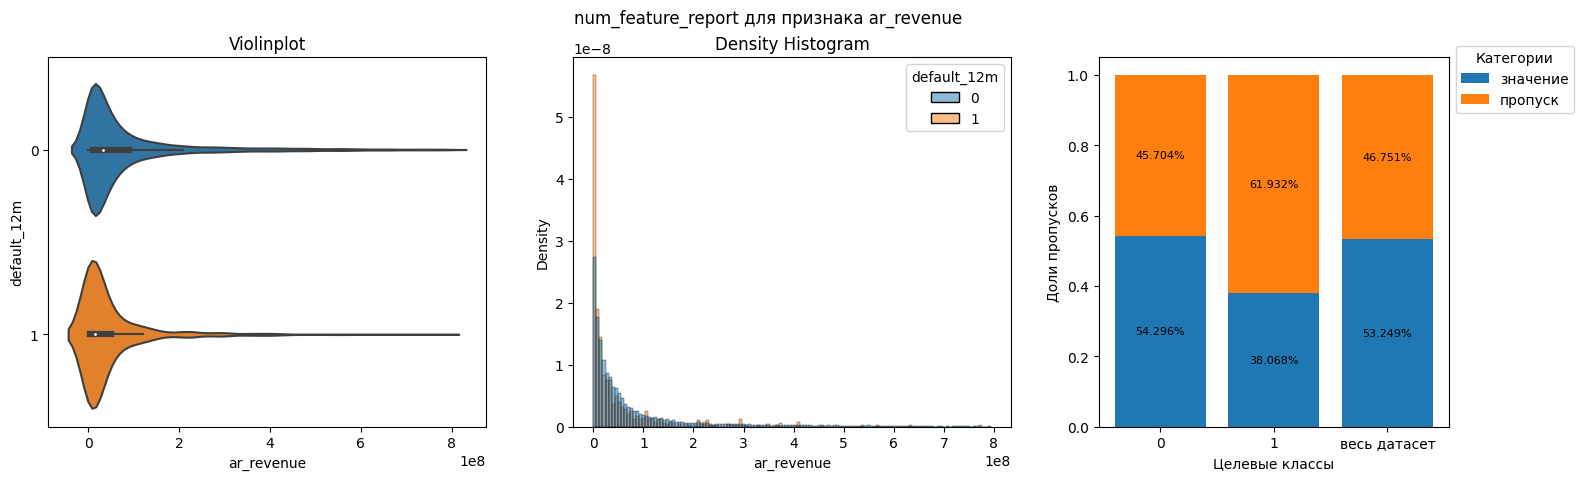

In [9]:
fig, axes = num_feature_report(data, feature_colname='ar_revenue', target_colname='default_12m')

#### `ar_total_expenses` - Общие расходы за последний год

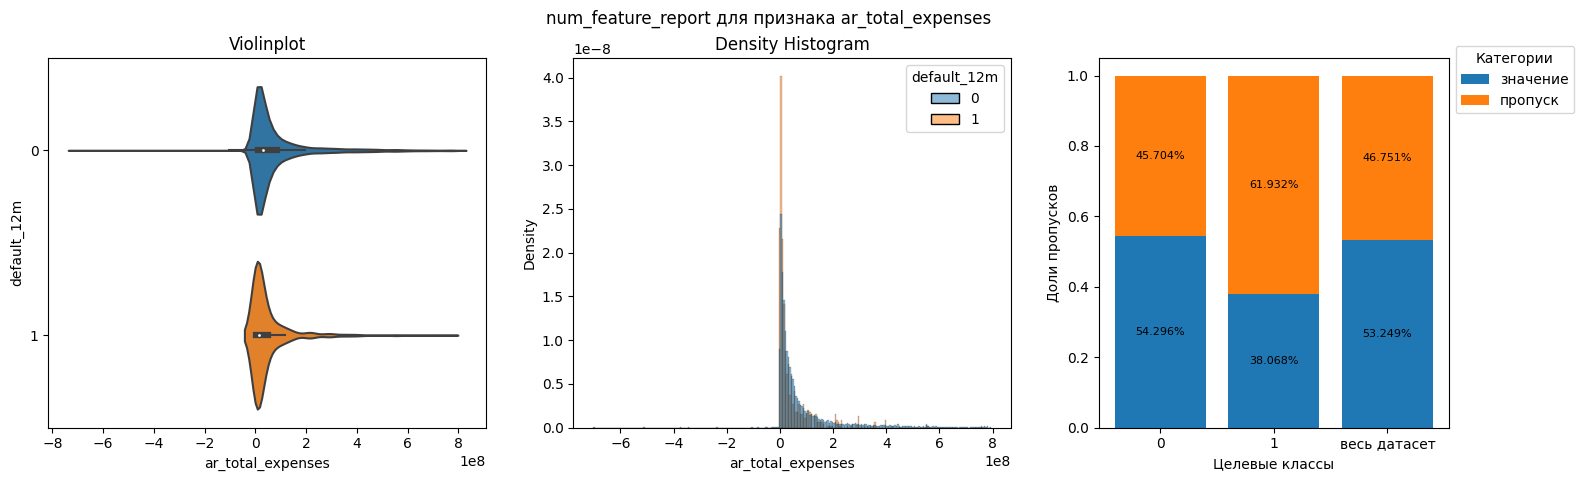

In [10]:
fig, axes = num_feature_report(data, feature_colname='ar_total_expenses', target_colname='default_12m')

#### `ar_sale_cost` - Себестоимость продаж (на конец последнего года)

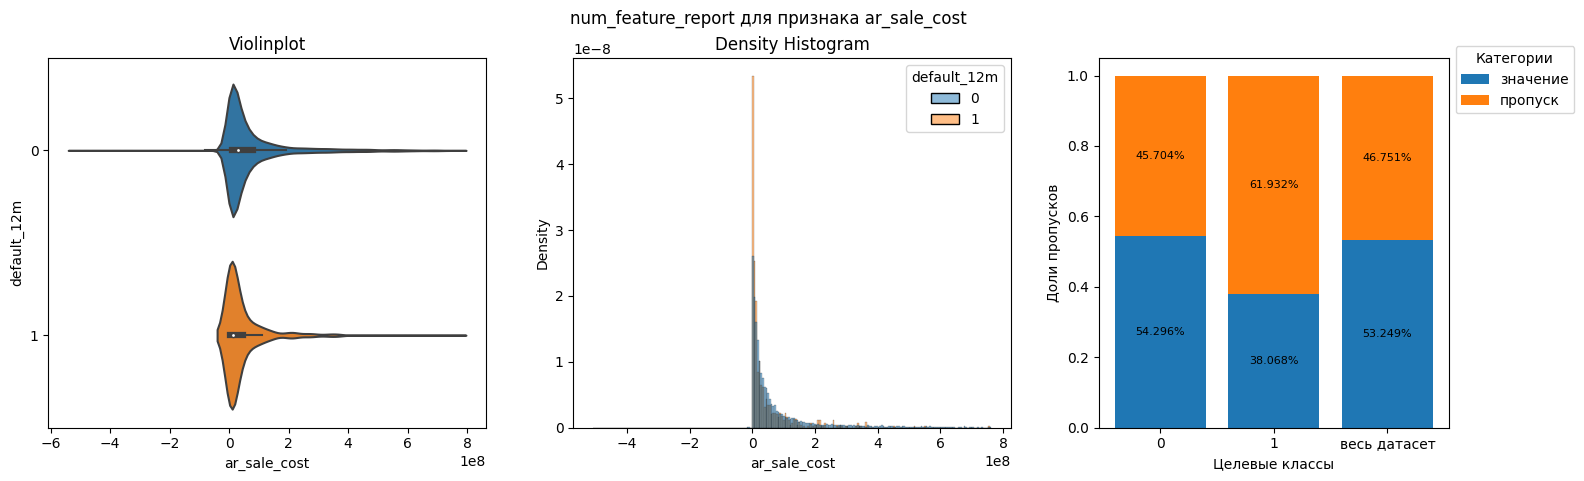

In [11]:
fig, axes = num_feature_report(data, feature_colname='ar_sale_cost', target_colname='default_12m')

#### `ar_selling_expenses` - Коммерческие расходы (на конец последнего года)

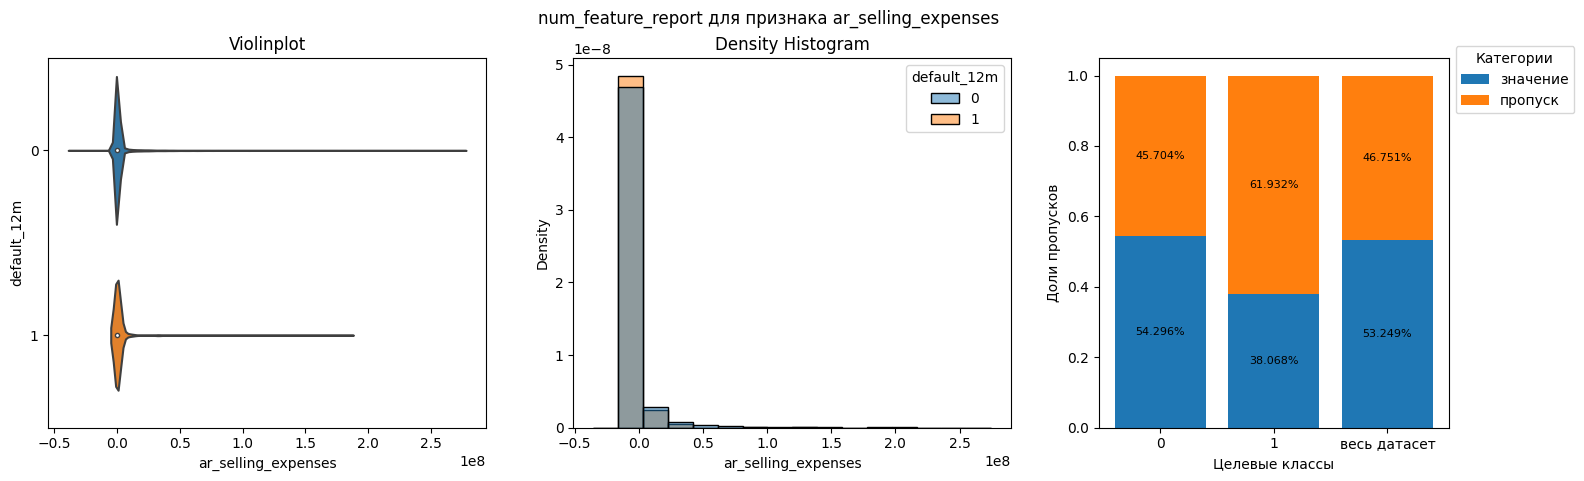

In [12]:
fig, axes = num_feature_report(data, feature_colname='ar_selling_expenses', target_colname='default_12m')

#### `ar_management_expenses` - Управленческие расходы (на конец последнего года)

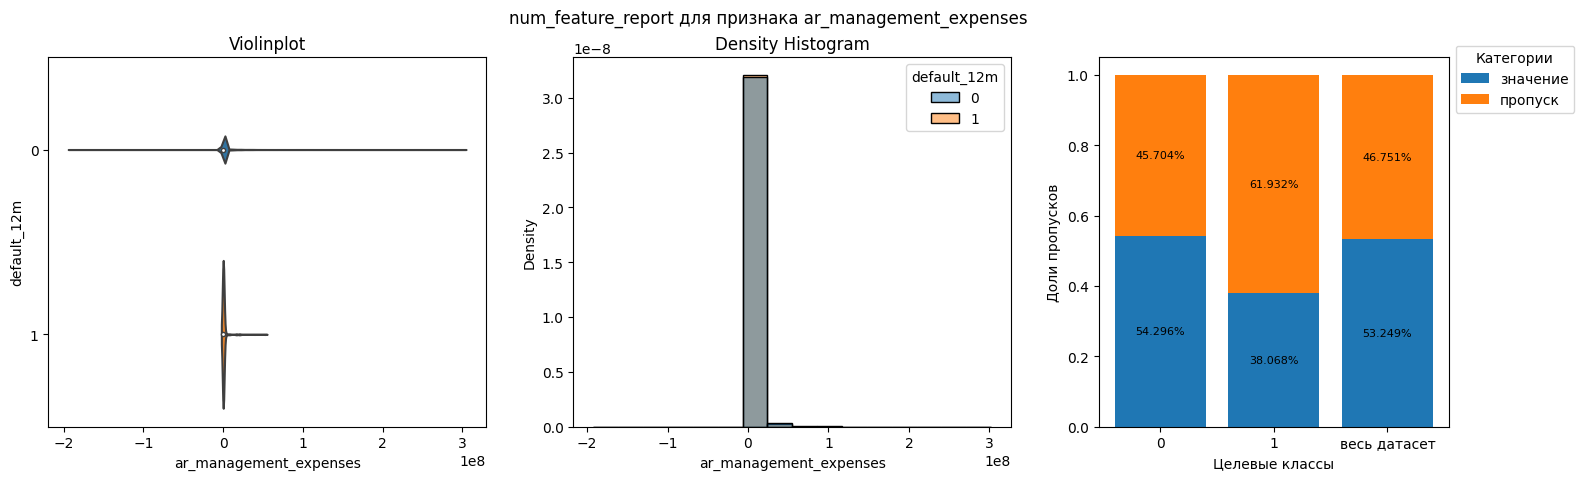

In [13]:
fig, axes = num_feature_report(data, feature_colname='ar_management_expenses', target_colname='default_12m')

#### `ar_sale_profit` - Прибыль от реализации (на конец последнего года)

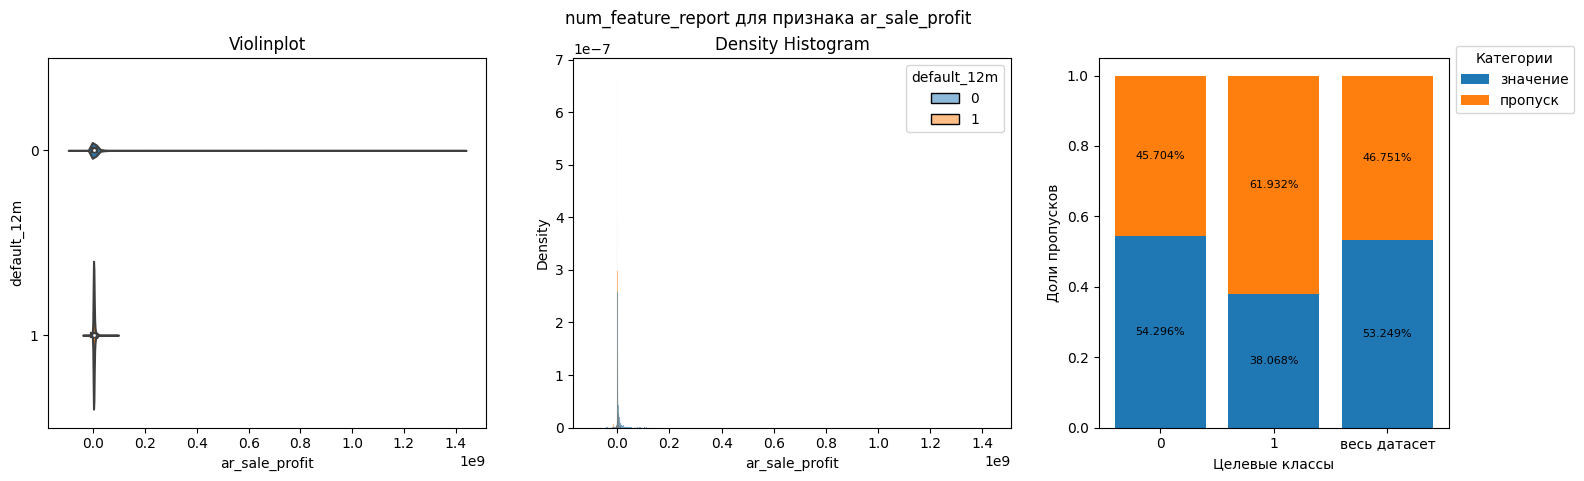

In [14]:
fig, axes = num_feature_report(data, feature_colname='ar_sale_profit', target_colname='default_12m')

#### `ar_balance_of_rvns_and_expns` - Баланс доходов и расходов (на конец последнего года)

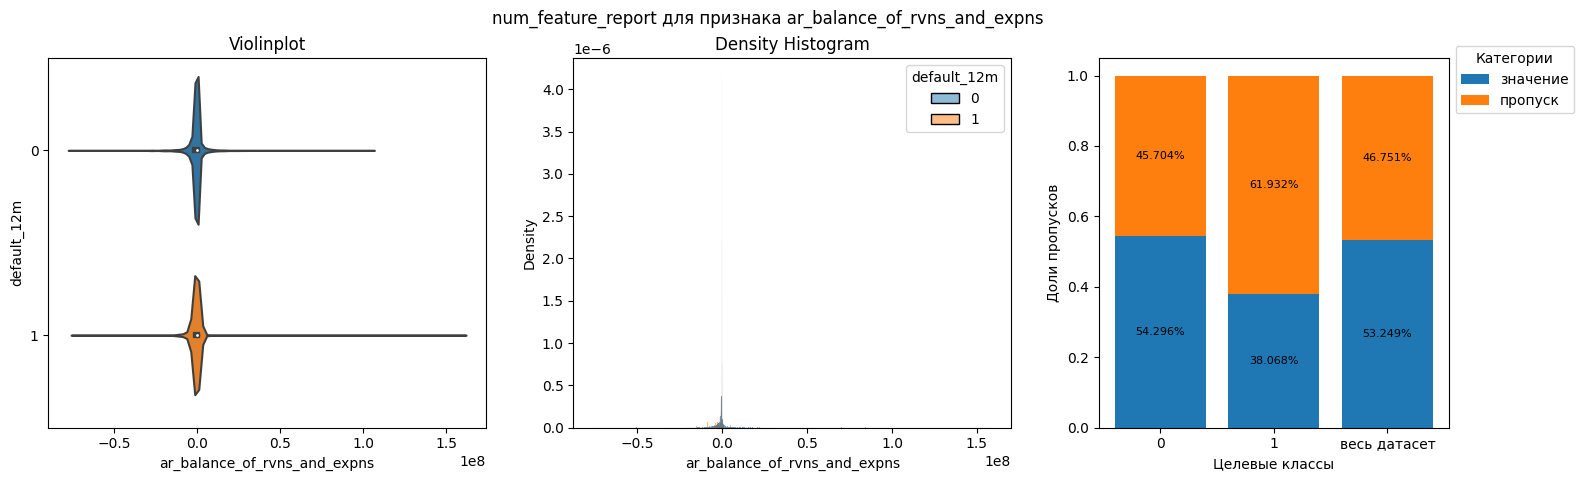

In [15]:
fig, axes = num_feature_report(data, feature_colname='ar_balance_of_rvns_and_expns', target_colname='default_12m')

#### `ar_profit_before_tax` - Валовая прибыль (на конец последнего года)

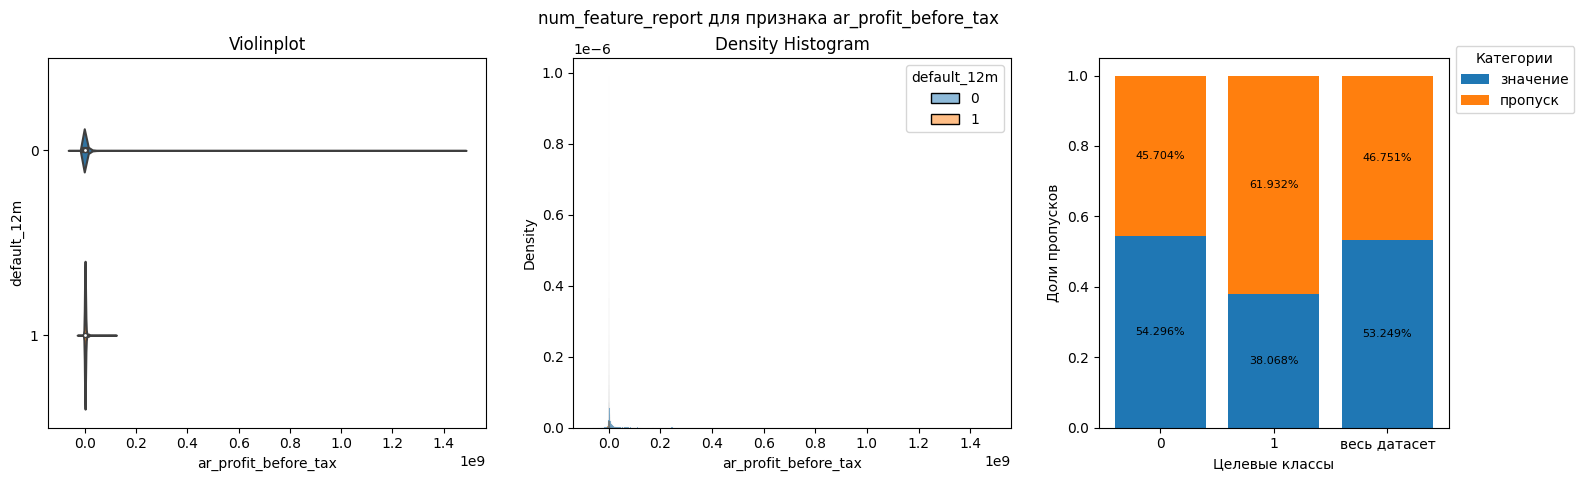

In [16]:
fig, axes = num_feature_report(data, feature_colname='ar_profit_before_tax', target_colname='default_12m')

#### `ar_taxes` - Текущий налог на прибыль (на конец последнего года)

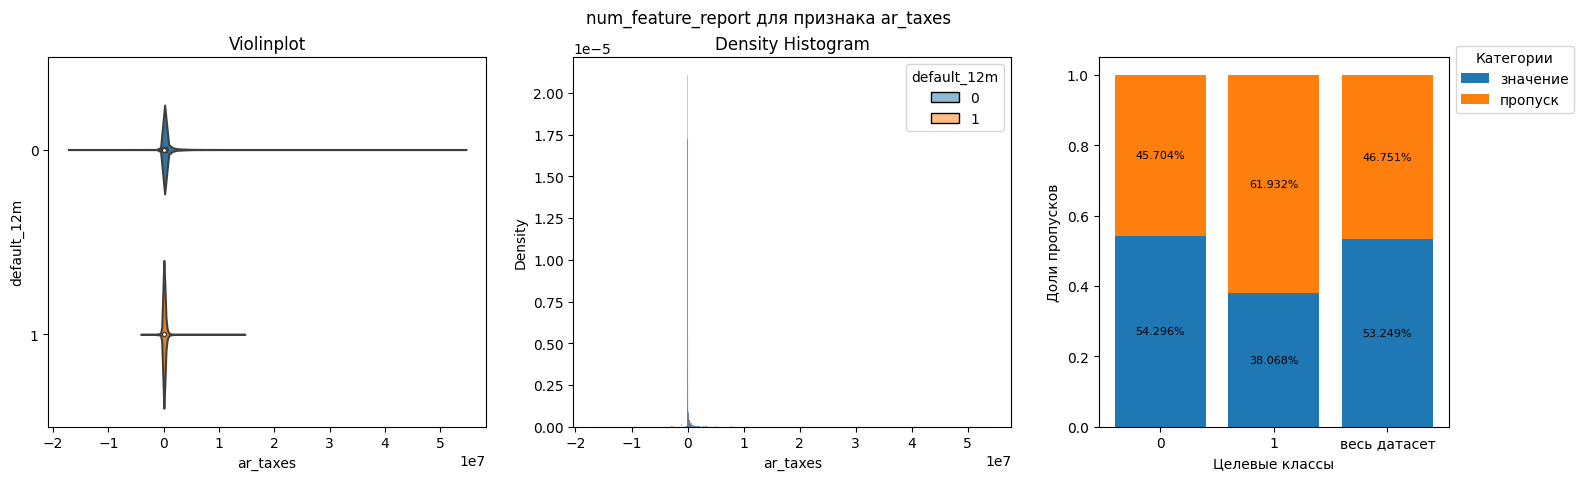

In [17]:
fig, axes = num_feature_report(data, feature_colname='ar_taxes', target_colname='default_12m')

#### `ar_other_profit_and_losses` - Прочие доходы и расходы (на конец последнего года)

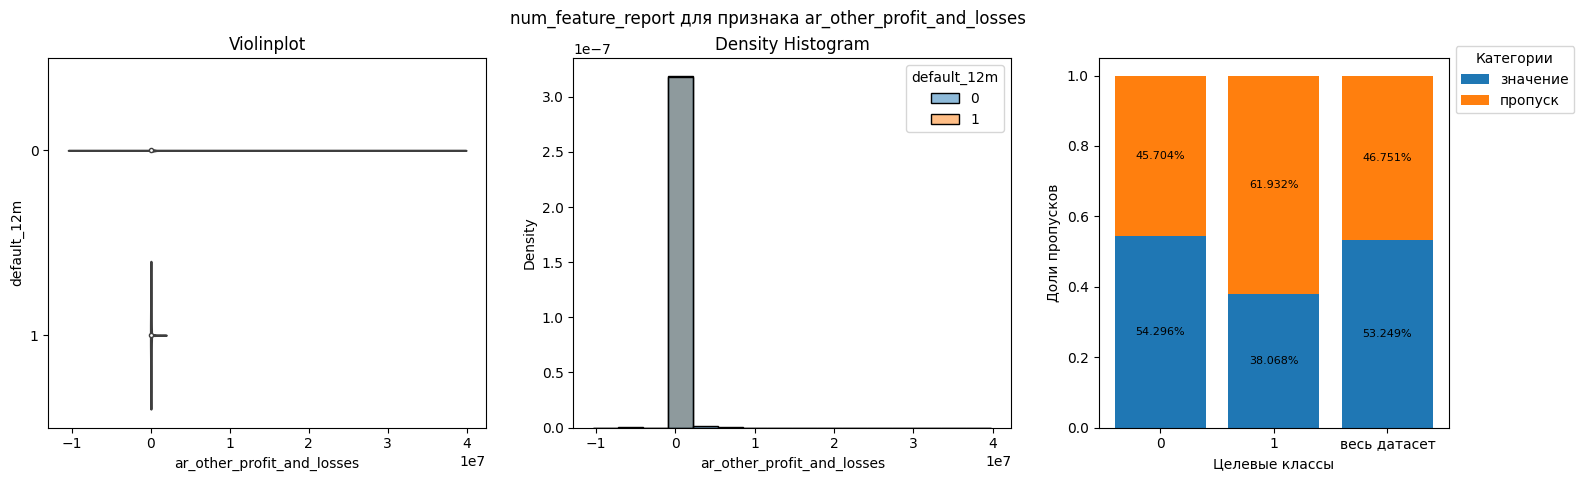

In [18]:
fig, axes = num_feature_report(data, feature_colname='ar_other_profit_and_losses', target_colname='default_12m')

#### `ar_net_profit` - Чистая прибыль (на конец последнего года)

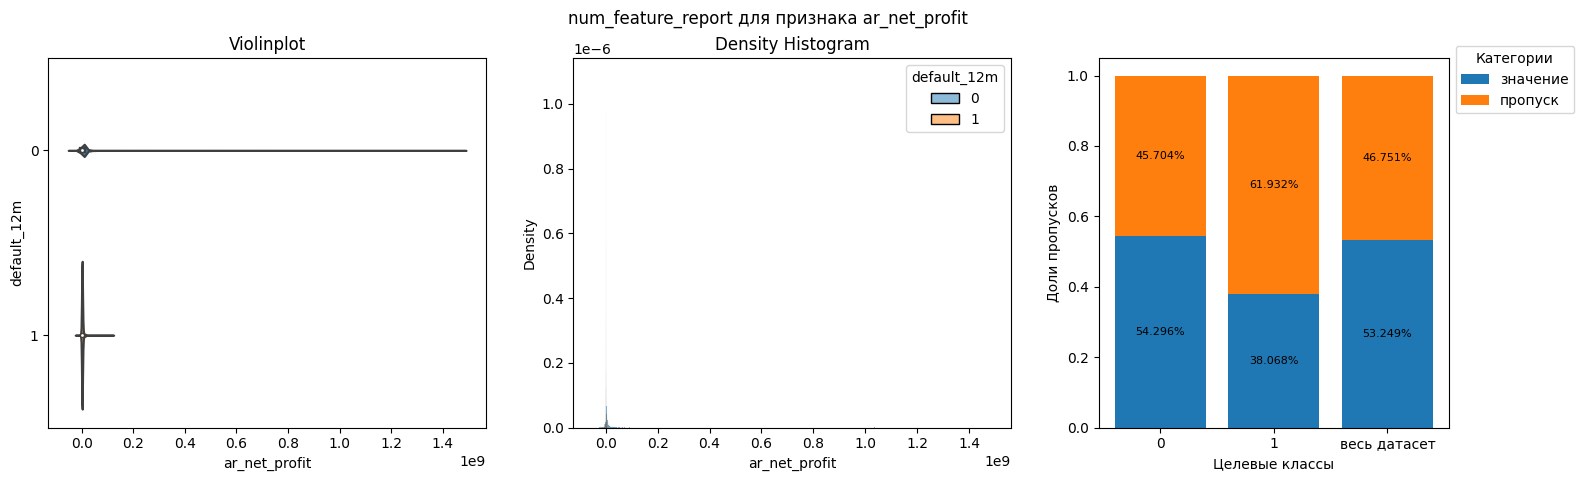

In [19]:
fig, axes = num_feature_report(data, feature_colname='ar_net_profit', target_colname='default_12m')

### ab

[к навигации](#Навигация)

#### `ab_immobilized_assets` - Основные внеоборотные средства за последний год

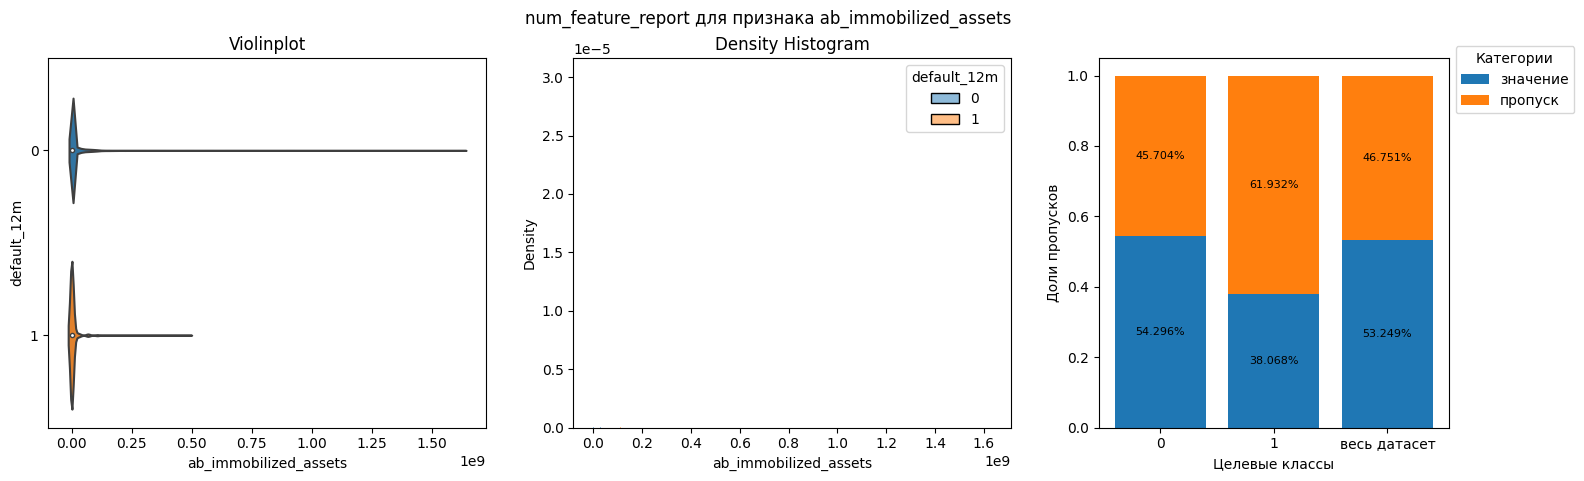

In [20]:
fig, axes = num_feature_report(data, feature_colname='ab_immobilized_assets', target_colname='default_12m')

#### `ab_mobile_current_assets` - Оборотные активы (на конец последнего года)

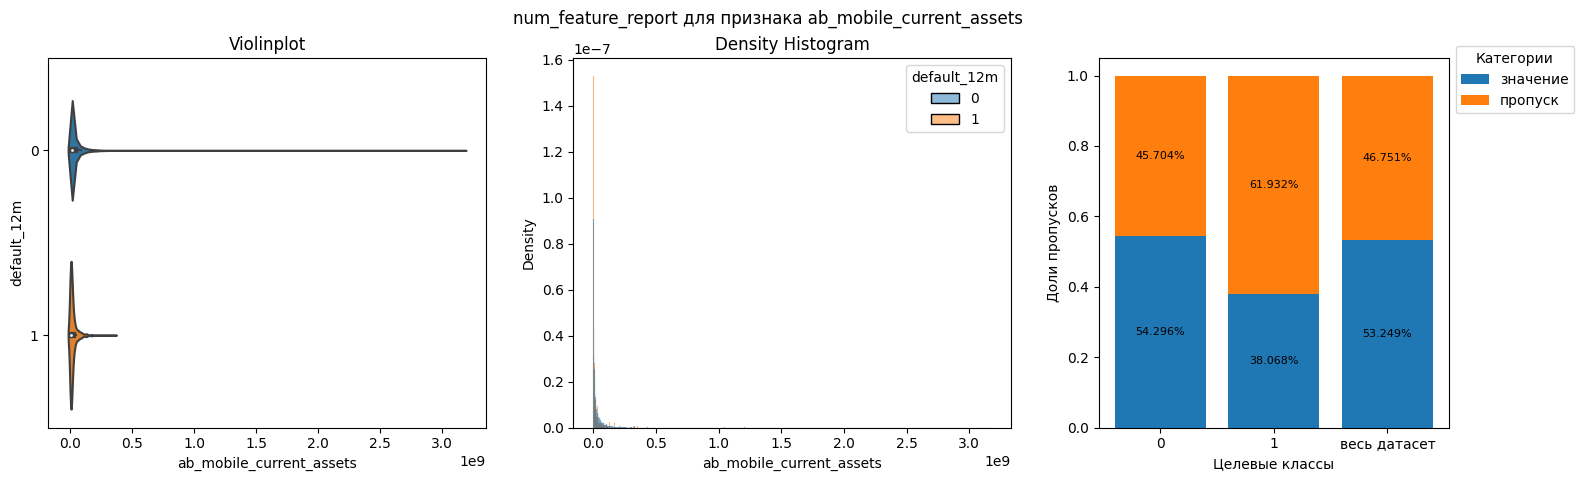

In [21]:
fig, axes = num_feature_report(data, feature_colname='ab_mobile_current_assets', target_colname='default_12m')

#### `ab_inventory` - Запасы (на конец последнего года)

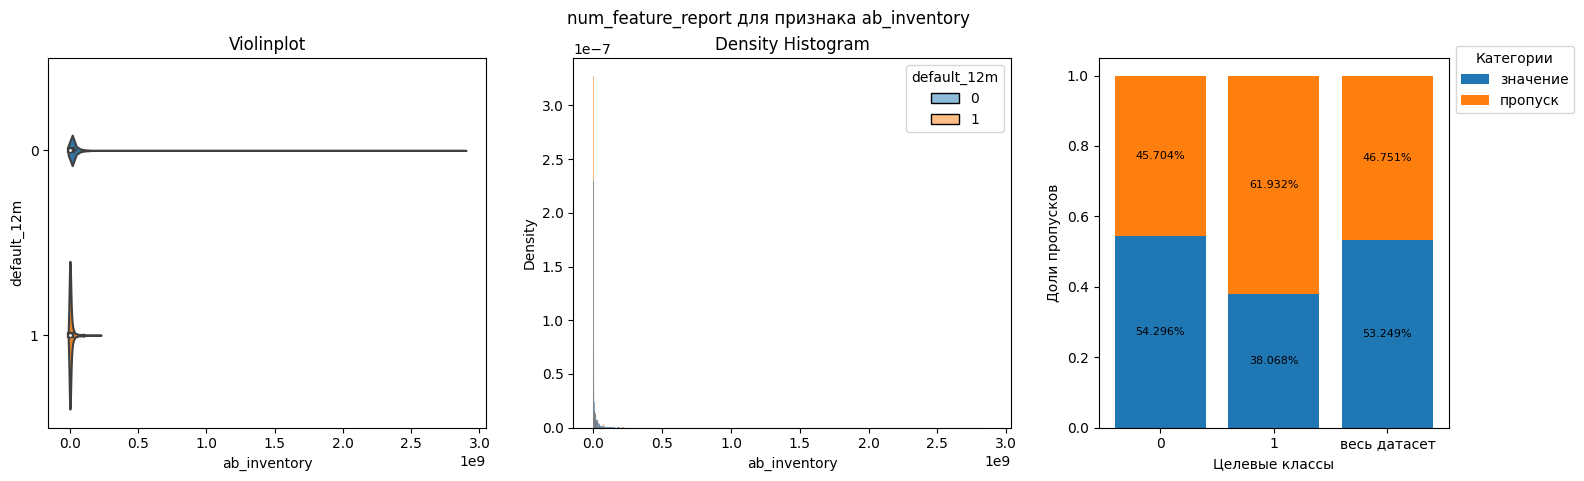

In [22]:
fig, axes = num_feature_report(data, feature_colname='ab_inventory', target_colname='default_12m')

#### `ab_accounts_receivable` - Дебиторская задолженность (на конец последнего года)

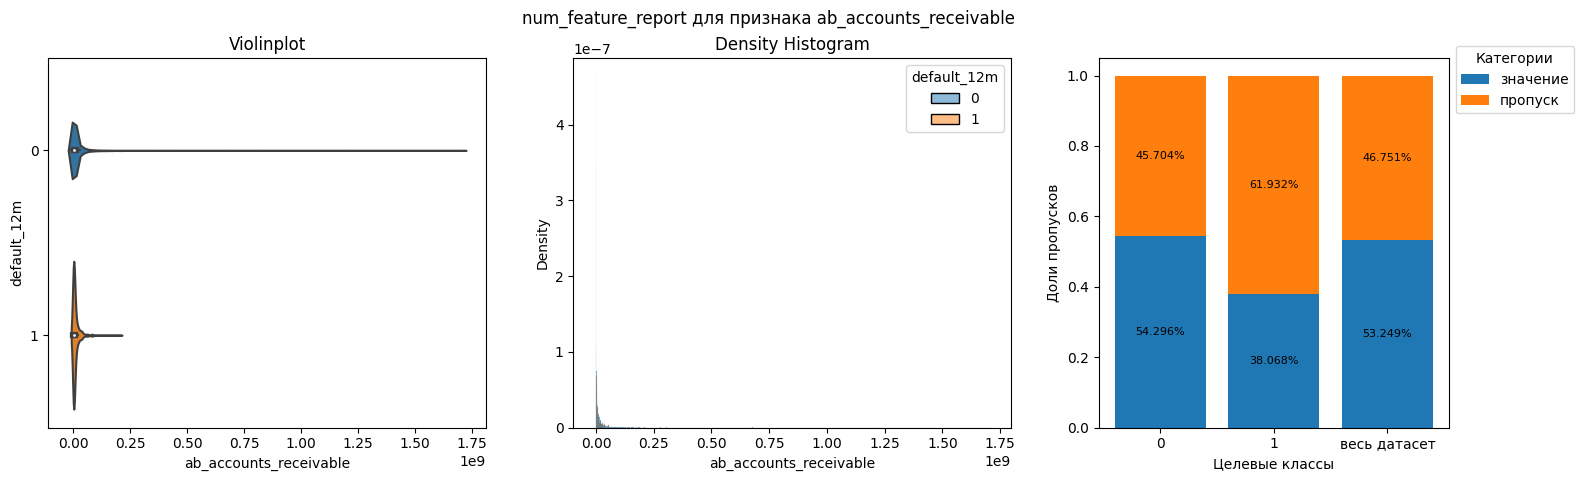

In [23]:
fig, axes = num_feature_report(data, feature_colname='ab_accounts_receivable', target_colname='default_12m')

#### `ab_other_current_assets` - Прочие оборотные активы (на конец последнего года)

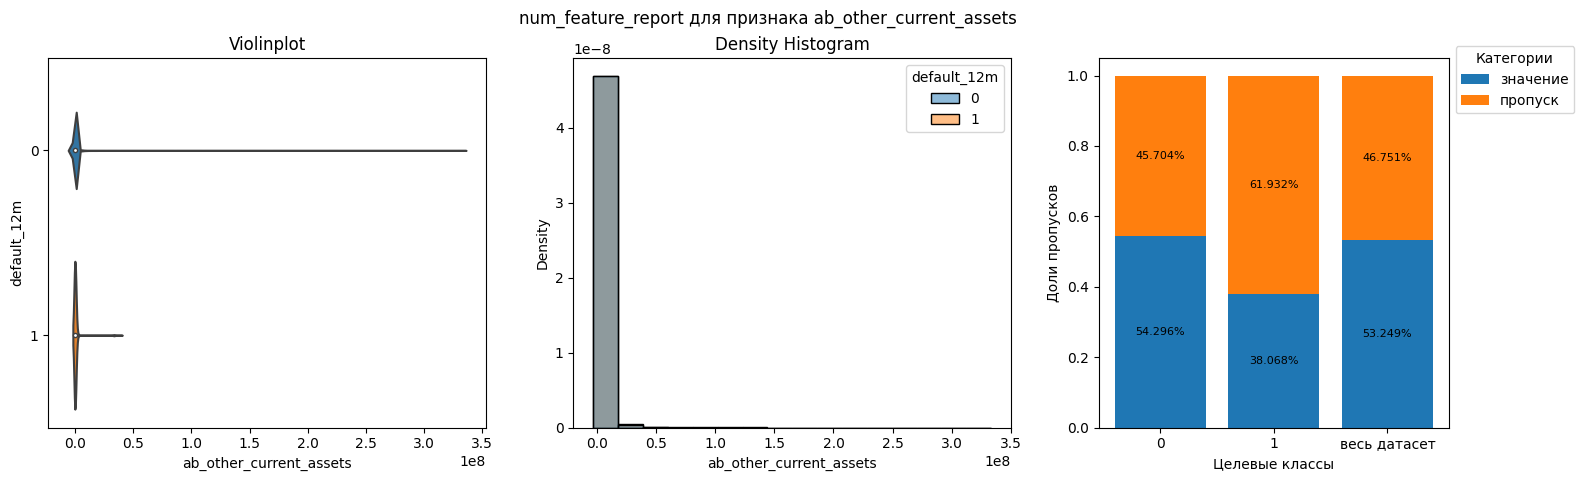

In [24]:
fig, axes = num_feature_report(data, feature_colname='ab_other_current_assets', target_colname='default_12m')

#### `ab_cash_and_securities` - Денежные средства и денежные эквиваленты (на конец последнего года)

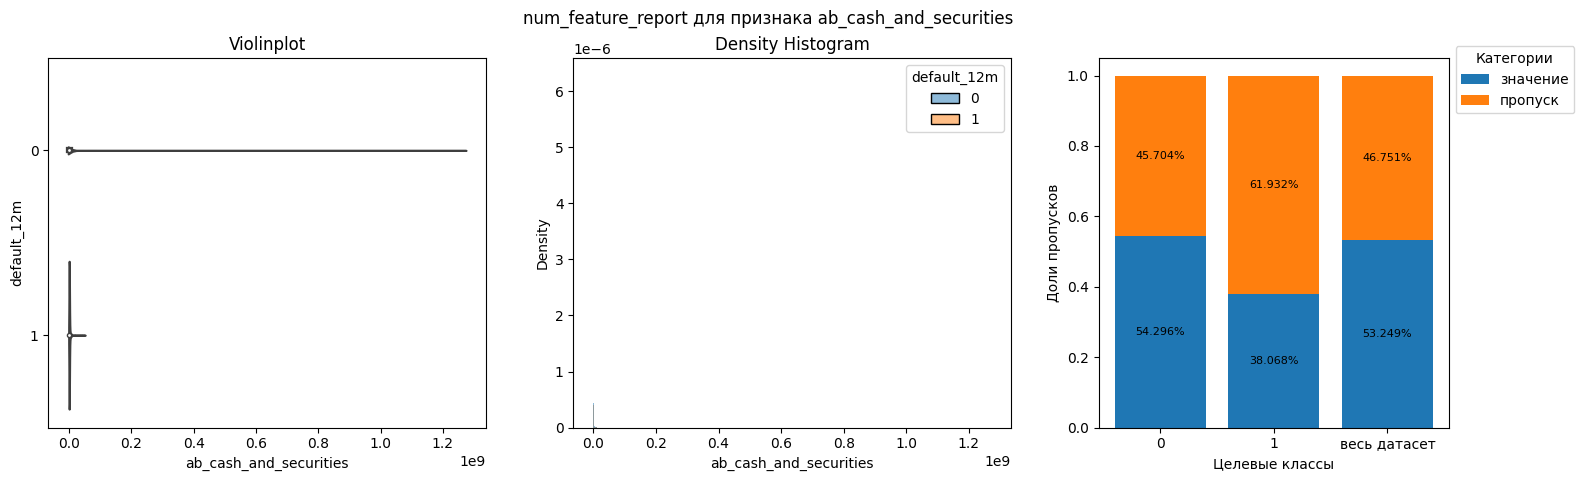

In [25]:
fig, axes = num_feature_report(data, feature_colname='ab_cash_and_securities', target_colname='default_12m')

#### `ab_losses` - Нераспределенная прибыль (на конец последнего года)

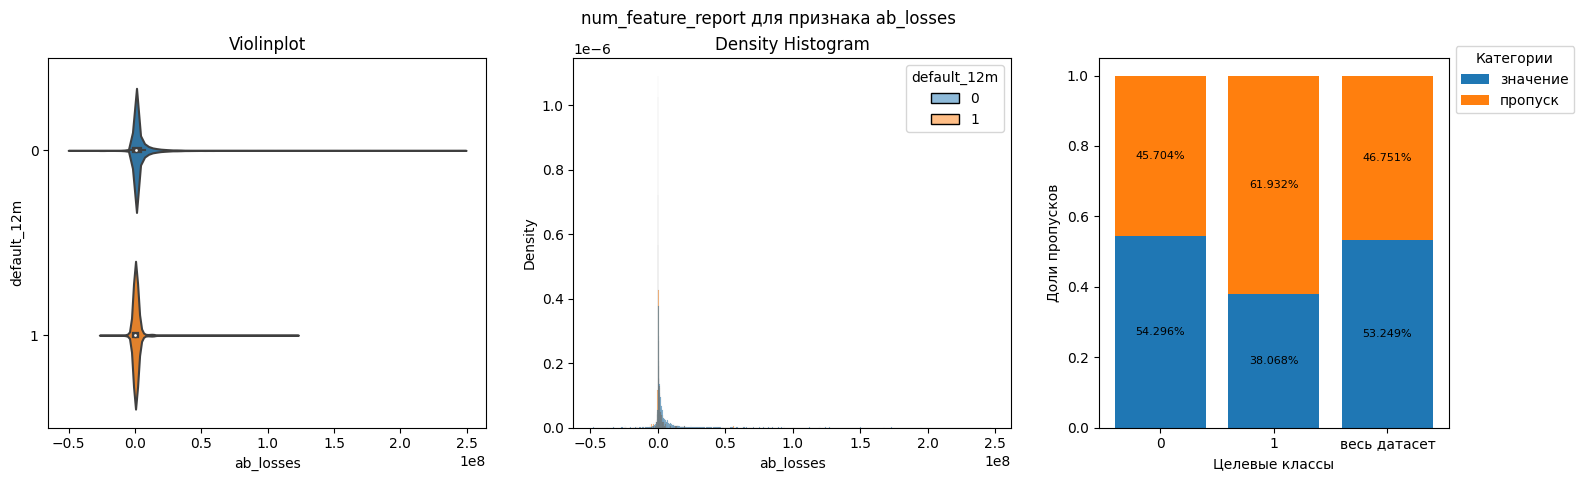

In [26]:
fig, axes = num_feature_report(data, feature_colname='ab_losses', target_colname='default_12m')

#### `ab_own_capital` - Капитал (на конец последнего года)

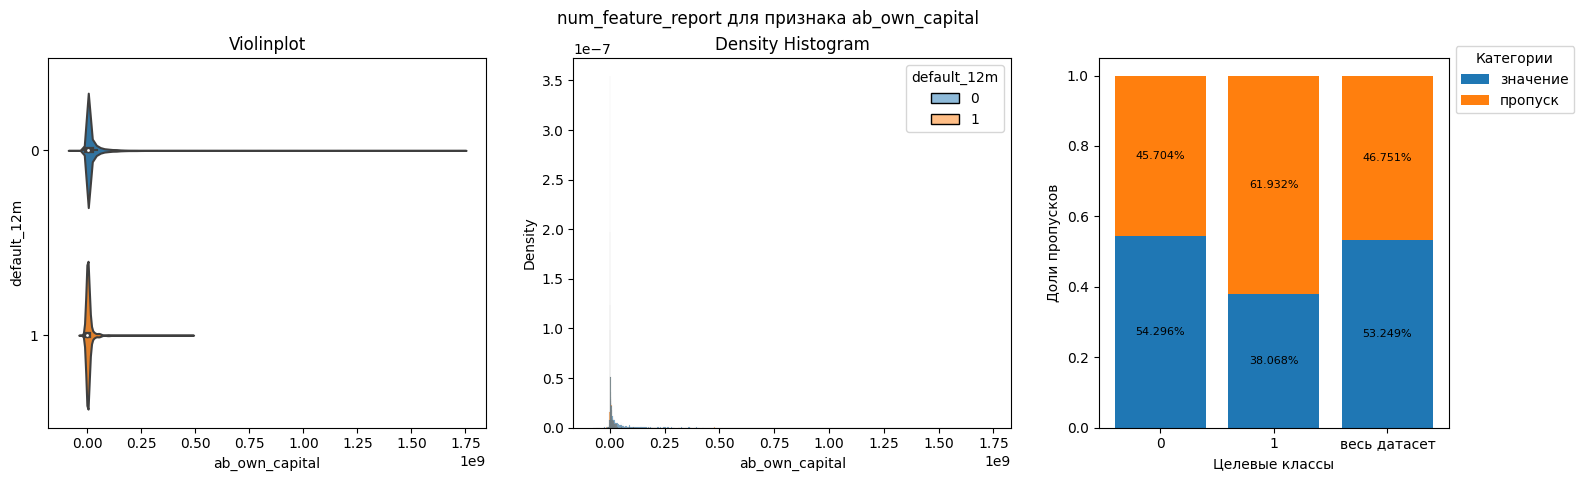

In [27]:
fig, axes = num_feature_report(data, feature_colname='ab_own_capital', target_colname='default_12m')

#### `ab_borrowed_capital` - Общие долговые обязательства (на конец последнего года)

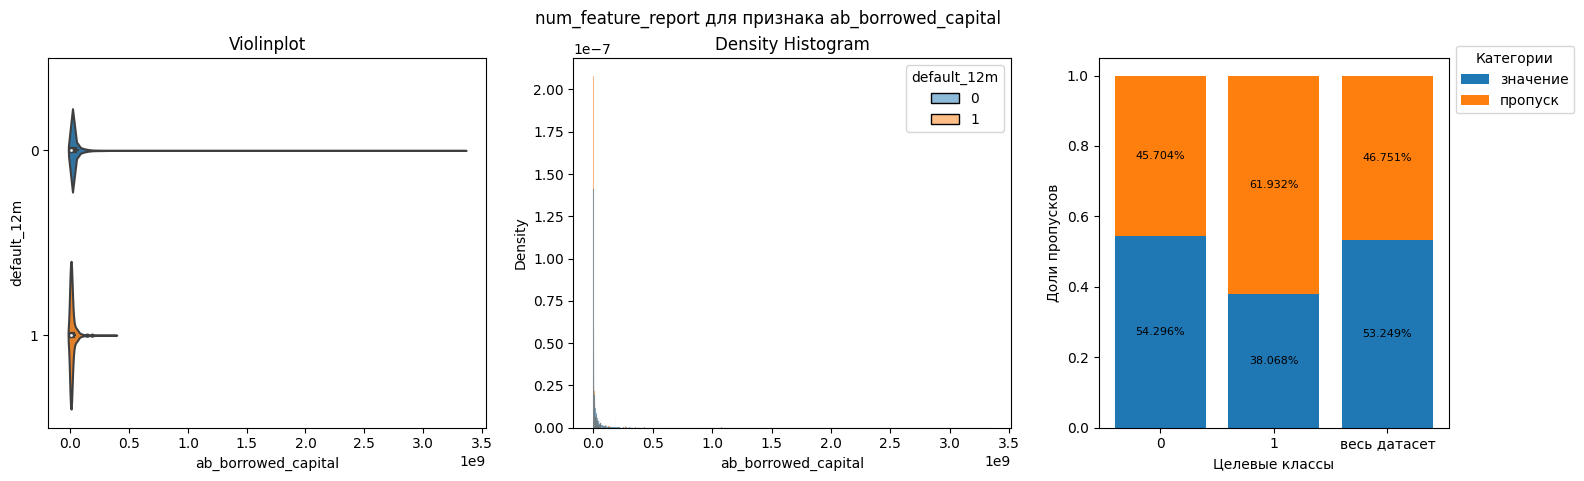

In [28]:
fig, axes = num_feature_report(data, feature_colname='ab_borrowed_capital', target_colname='default_12m')

#### `ab_long_term_liabilities` - Долгосрочный обязательства (на конец последнего года)

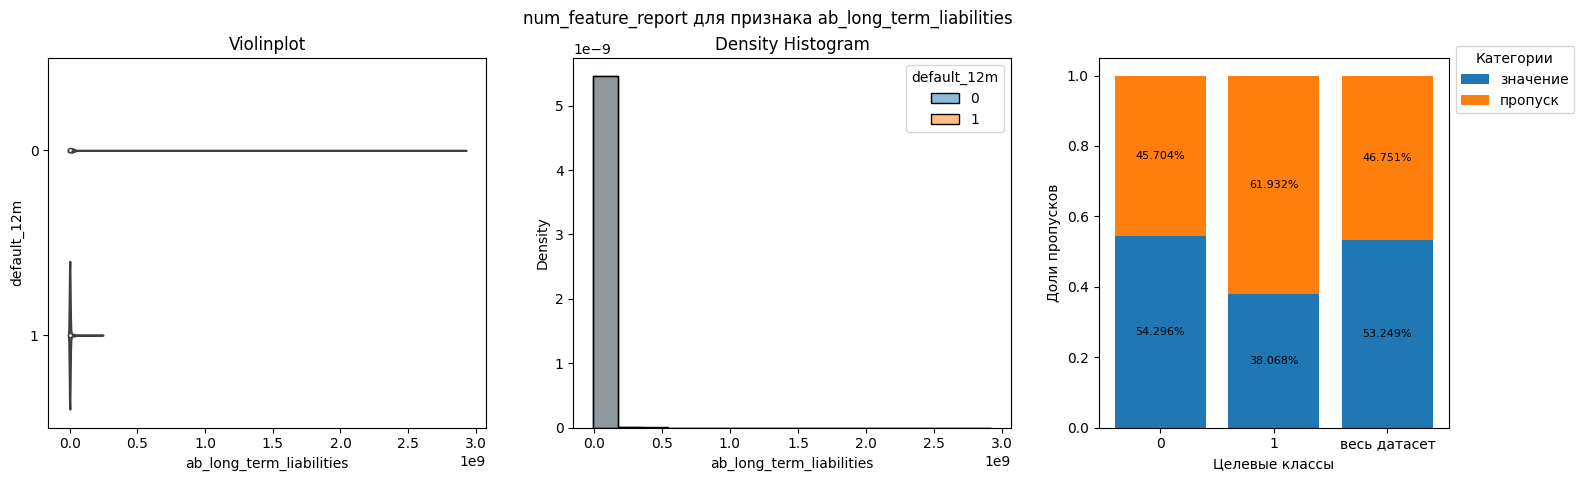

In [29]:
fig, axes = num_feature_report(data, feature_colname='ab_long_term_liabilities', target_colname='default_12m')

#### `ab_short_term_borrowing` - Краткосрочные заемные средства (на конец последнего года)

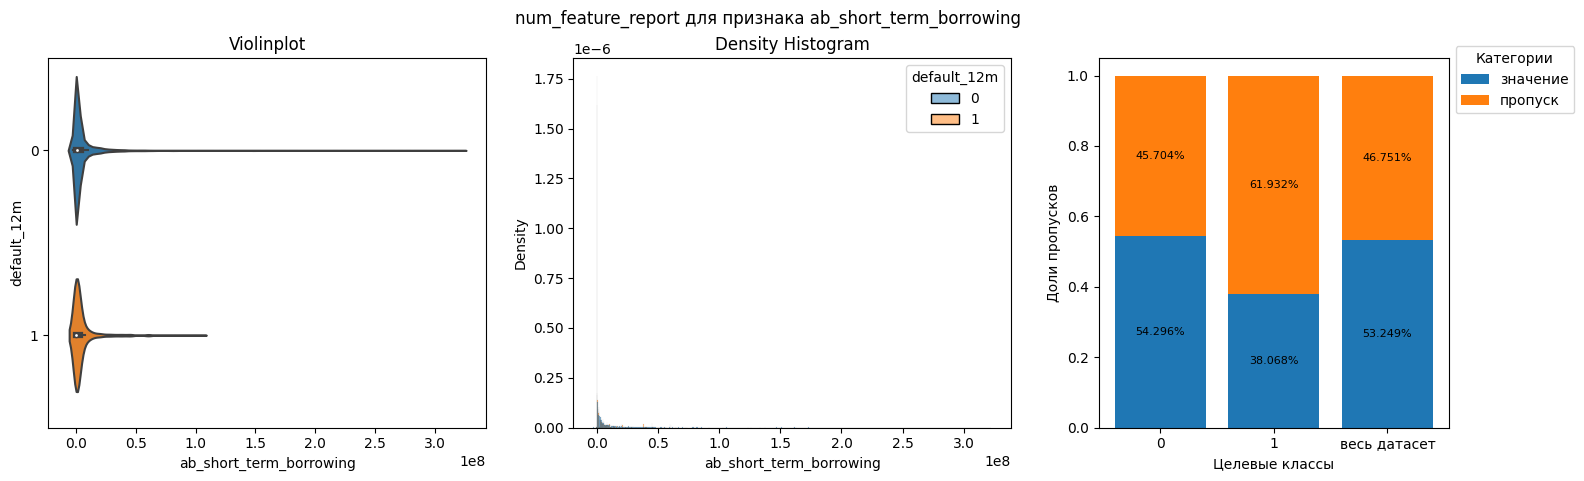

In [30]:
fig, axes = num_feature_report(data, feature_colname='ab_short_term_borrowing', target_colname='default_12m')

#### `ab_accounts_payable` - Кредиторская задодженность за последний год

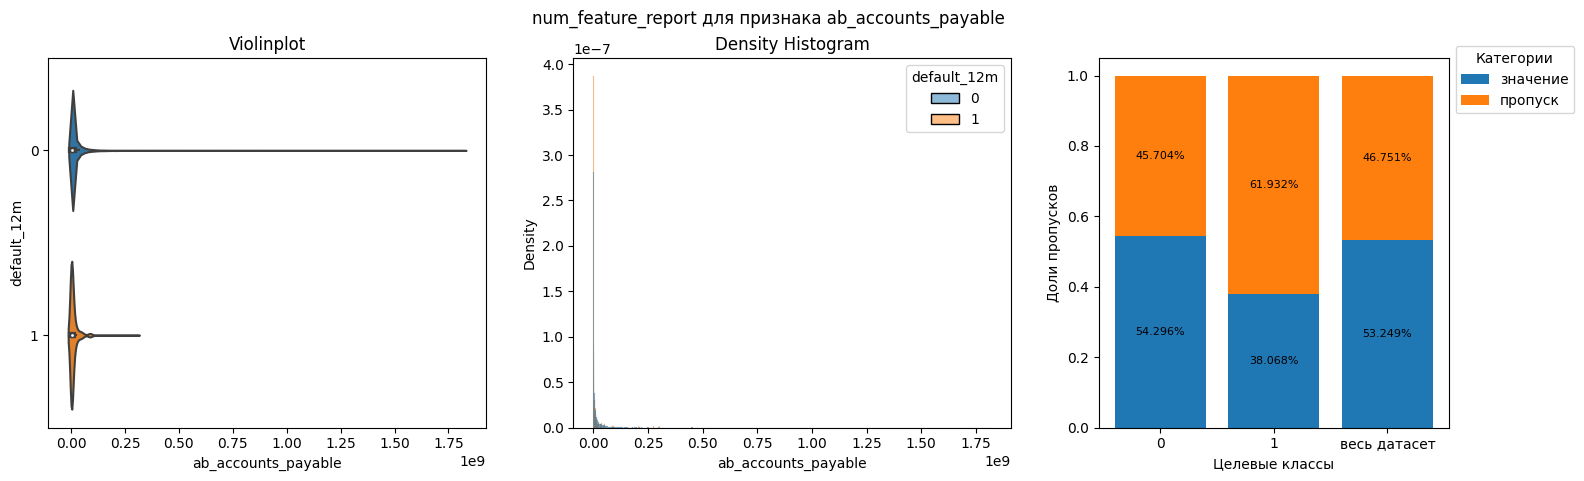

In [31]:
fig, axes = num_feature_report(data, feature_colname='ab_accounts_payable', target_colname='default_12m')

#### `ab_other_borrowings` - Прочие обязательства (на конец последнего года)

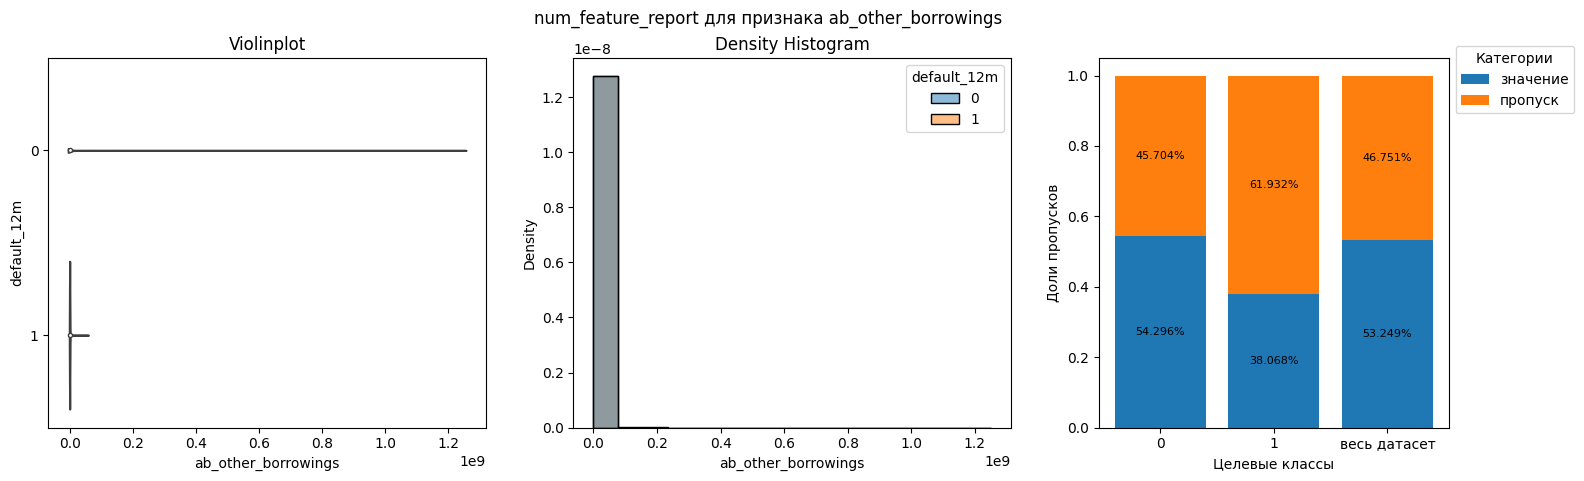

In [32]:
fig, axes = num_feature_report(data, feature_colname='ab_other_borrowings', target_colname='default_12m')

### age

[к навигации](#Навигация)

#### `bus_age` - Срок ведения бизнеса

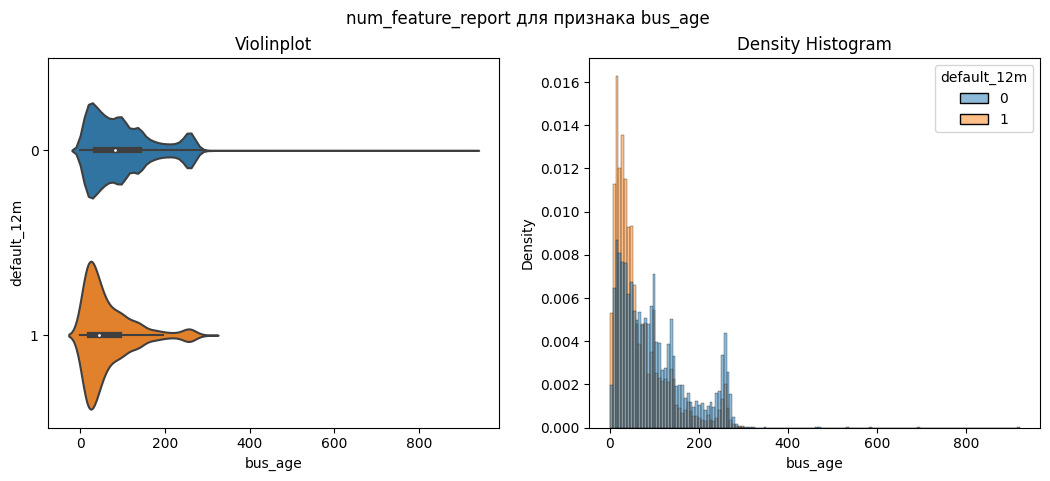

In [33]:
fig, axes = num_feature_report(data, feature_colname='bus_age', target_colname='default_12m')

#### `ogrn_age` - Срок с момента присваивания ОГРН

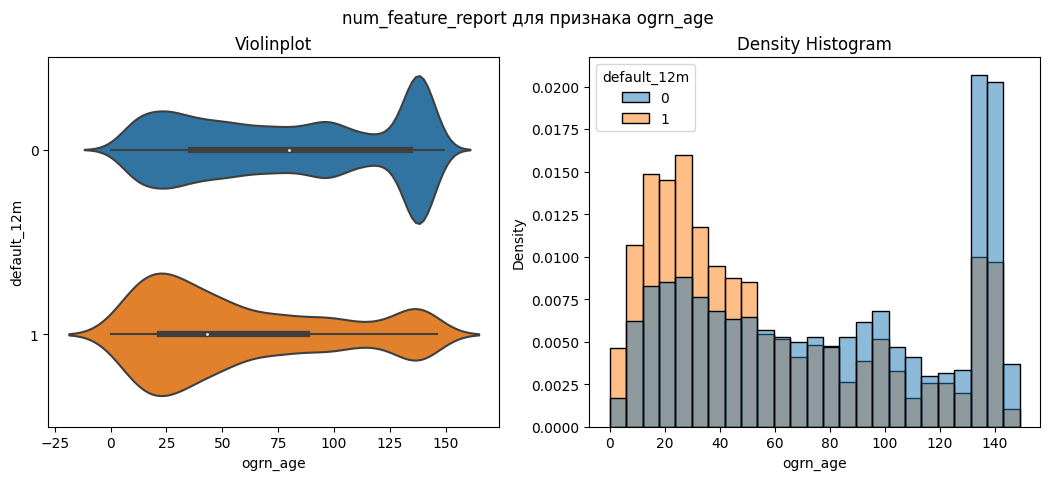

In [34]:
fig, axes = num_feature_report(data, feature_colname='ogrn_age', target_colname='default_12m')

#### `adr_actual_age` - Срок с момента регистрации юридического адреса

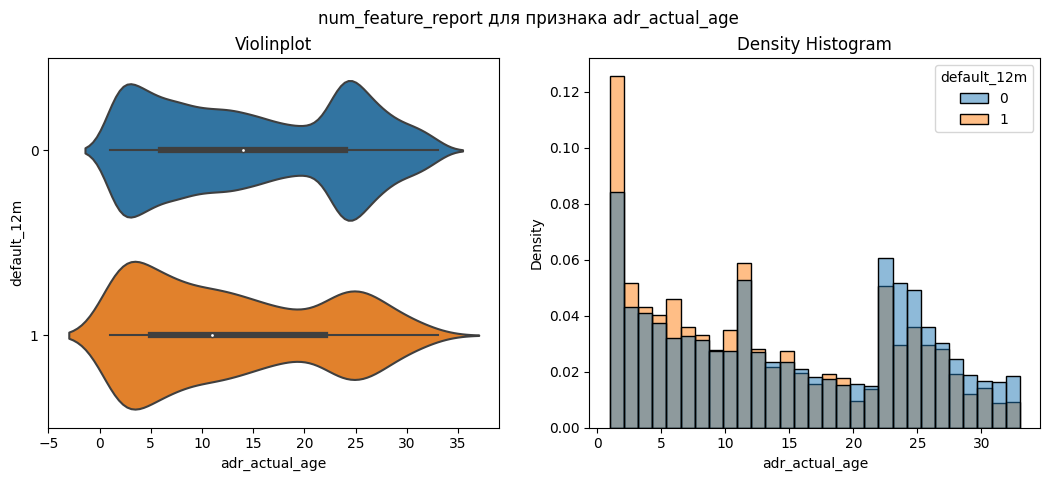

In [35]:
fig, axes = num_feature_report(data, feature_colname='adr_actual_age', target_colname='default_12m')

#### `head_actual_age` - Срок с момента назначения руководителя

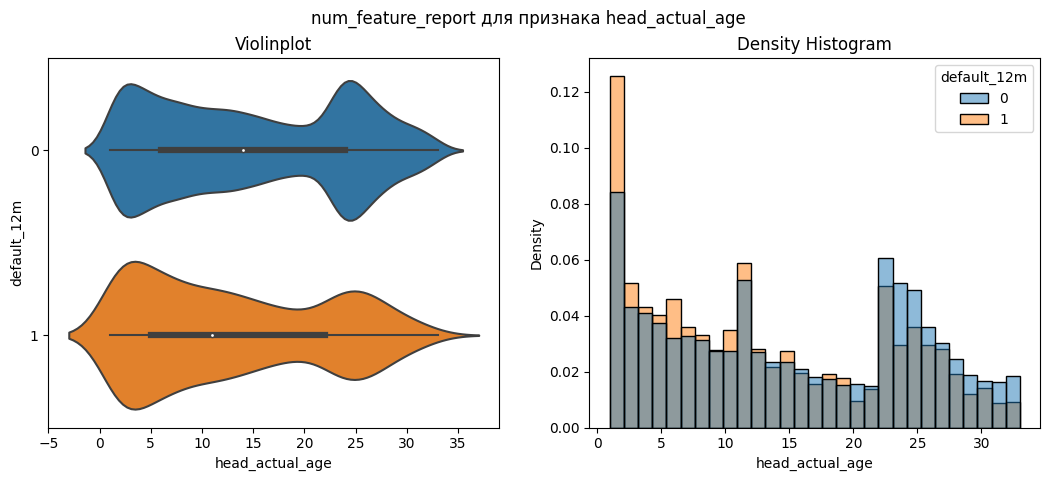

In [36]:
fig, axes = num_feature_report(data, feature_colname='head_actual_age', target_colname='default_12m')

#### `cap_actual_age` - Срок с момента установки капитала

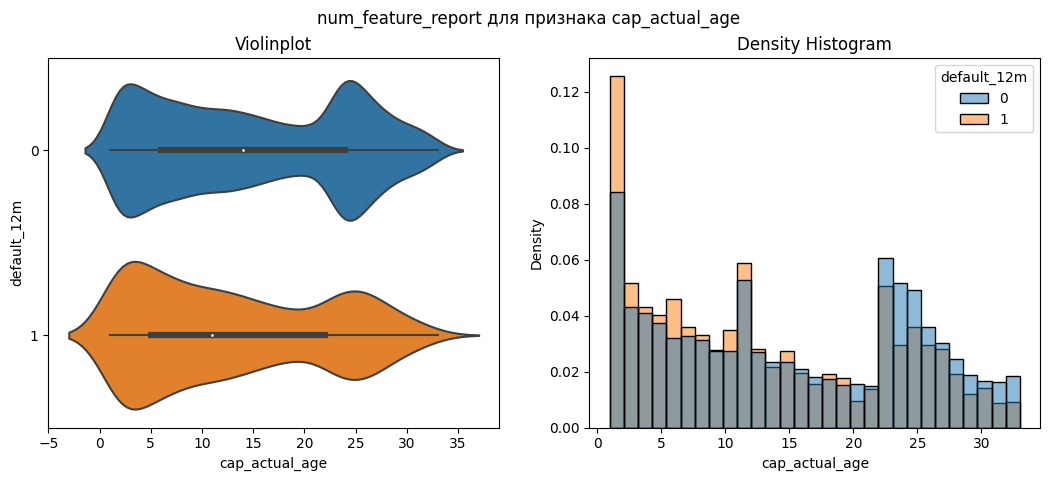

In [37]:
fig, axes = num_feature_report(data, feature_colname='cap_actual_age', target_colname='default_12m')

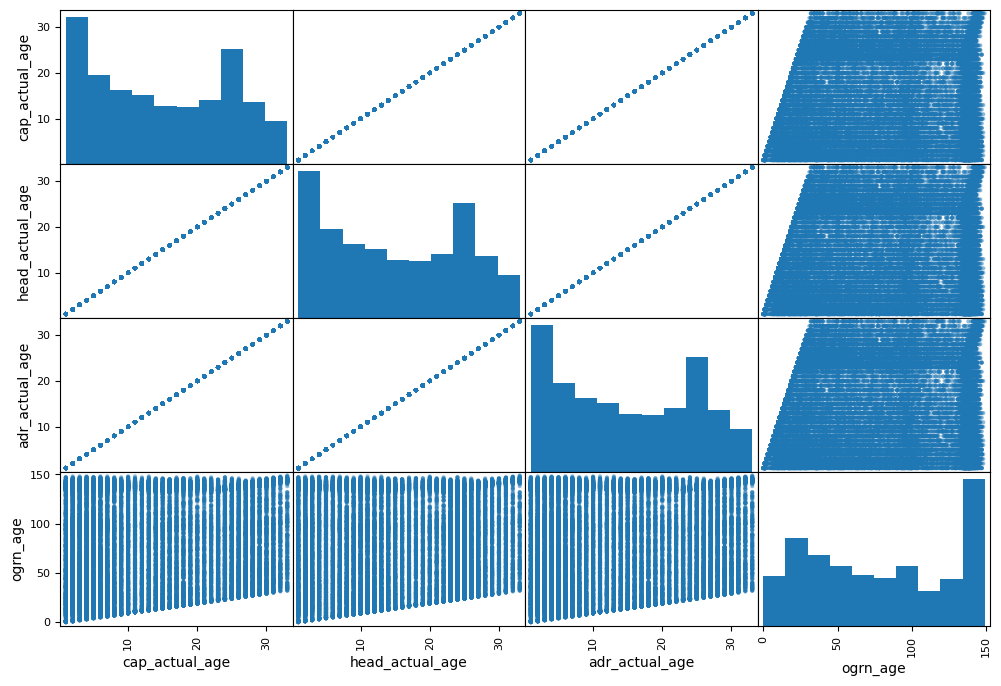

In [38]:
_ = pd.plotting.scatter_matrix(data[['cap_actual_age', 'head_actual_age', 'adr_actual_age', 'ogrn_age']], figsize=(12, 8))

### ul

[к навигации](#Навигация)

#### `ul_staff_range` - Количество сотрудников

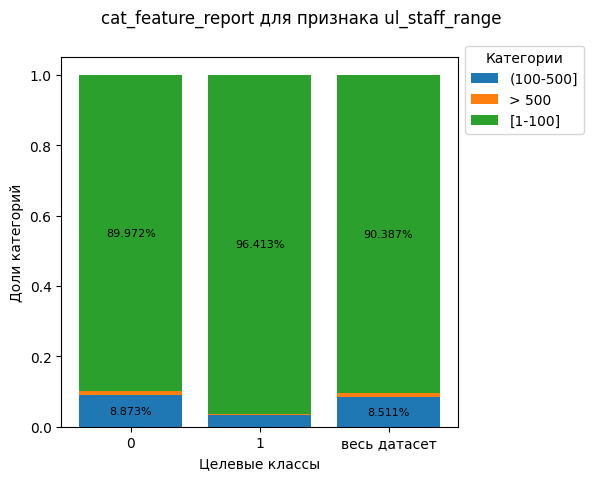

In [39]:
fig, axes = cat_feature_report(data, feature_colname='ul_staff_range', target_colname='default_12m')

#### `ul_capital_sum` - Величина капитала

In [40]:
# fig, axes = num_feature_report(data, feature_colname='ul_capital_sum', target_colname='default_12m')

#### `ul_founders_cnt` - Количество акционеров

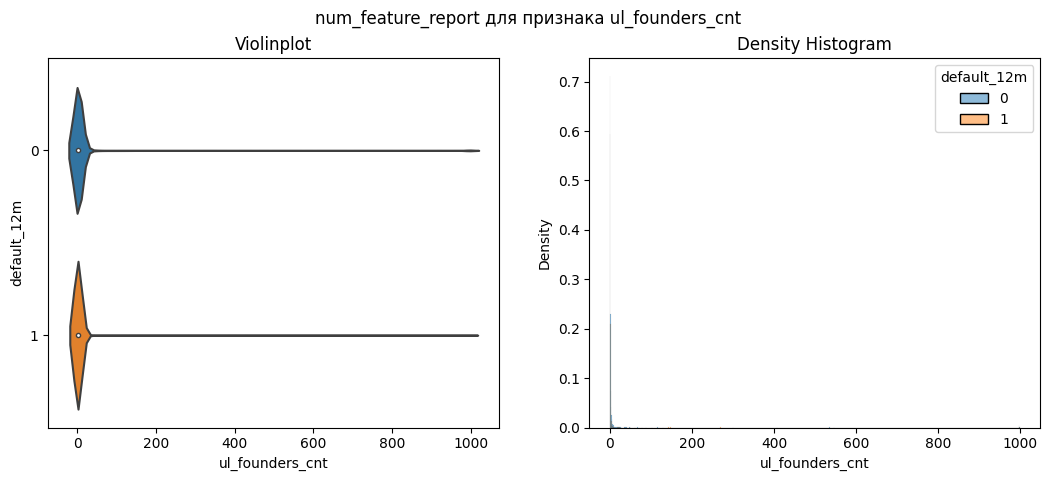

In [41]:
fig, axes = num_feature_report(
    data, feature_colname='ul_founders_cnt', target_colname='default_12m', histplot_args={'discrete': True})

#### `ul_branch_cnt` - Количество филиалов

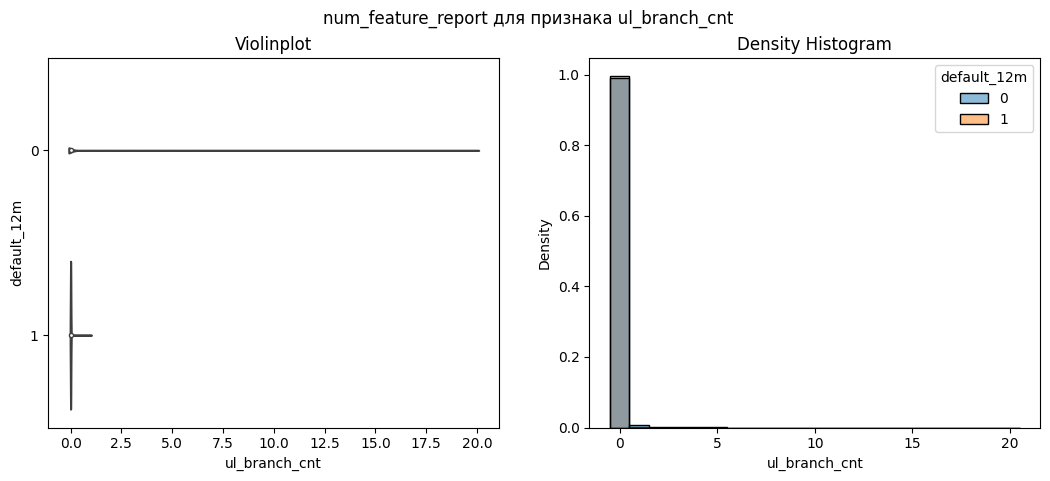

In [42]:
fig, axes = num_feature_report(
    data, feature_colname='ul_branch_cnt', target_colname='default_12m', histplot_args={'discrete': True})

#### `ul_strategic_flg` - Компания стратегического значения

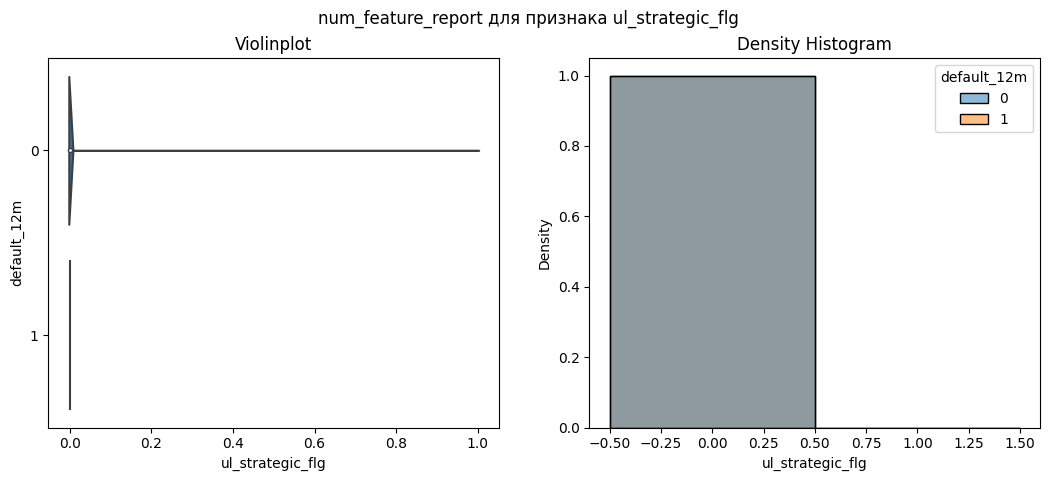

In [43]:
fig, axes = num_feature_report(
    data, feature_colname='ul_strategic_flg', target_colname='default_12m', histplot_args={'discrete': True})

#### `ul_systematizing_flg` - Системообразующая компания

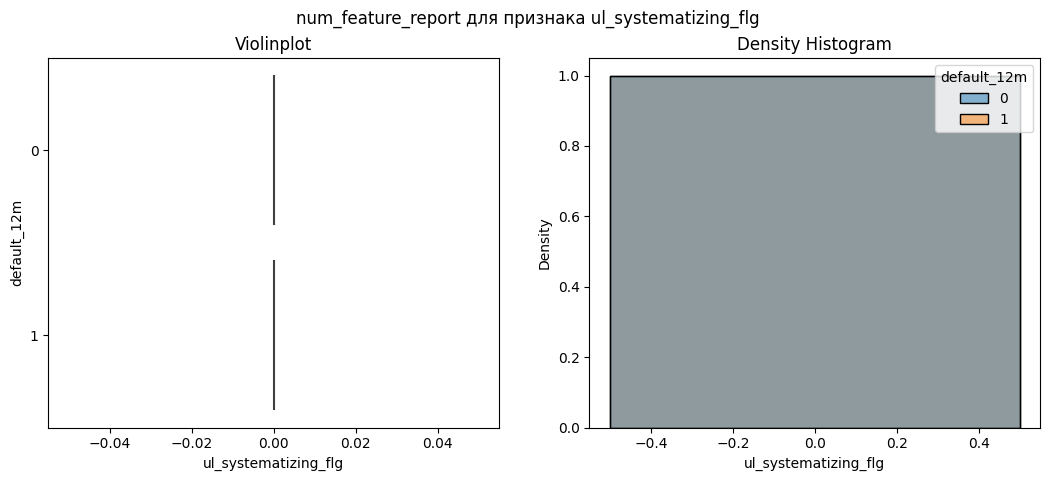

In [44]:
fig, axes = num_feature_report(
    data, feature_colname='ul_systematizing_flg', target_colname='default_12m', histplot_args={'discrete': True})

**Выводы:**
- в группах `ar` и `ab` все признаки численные, и везде наблюдаются выбросы
- есть странные отрицательные значение, норма ли это?
- группа `age` - потенциально хорошая группа признаков, `bus_age` имеет выбросы, последние 3 признака сильно скоррелированы
- группа `ul` - `ul_systematizing_flg` - константная фича, `ul_strategic_flg` - квазиконстантная, остальные признаки имеют выбросы

## Корреляции

In [45]:
NUM_FEATURES = data.columns.drop(['default_12m', 'ul_staff_range', 'ul_strategic_flg', 'ul_systematizing_flg'])

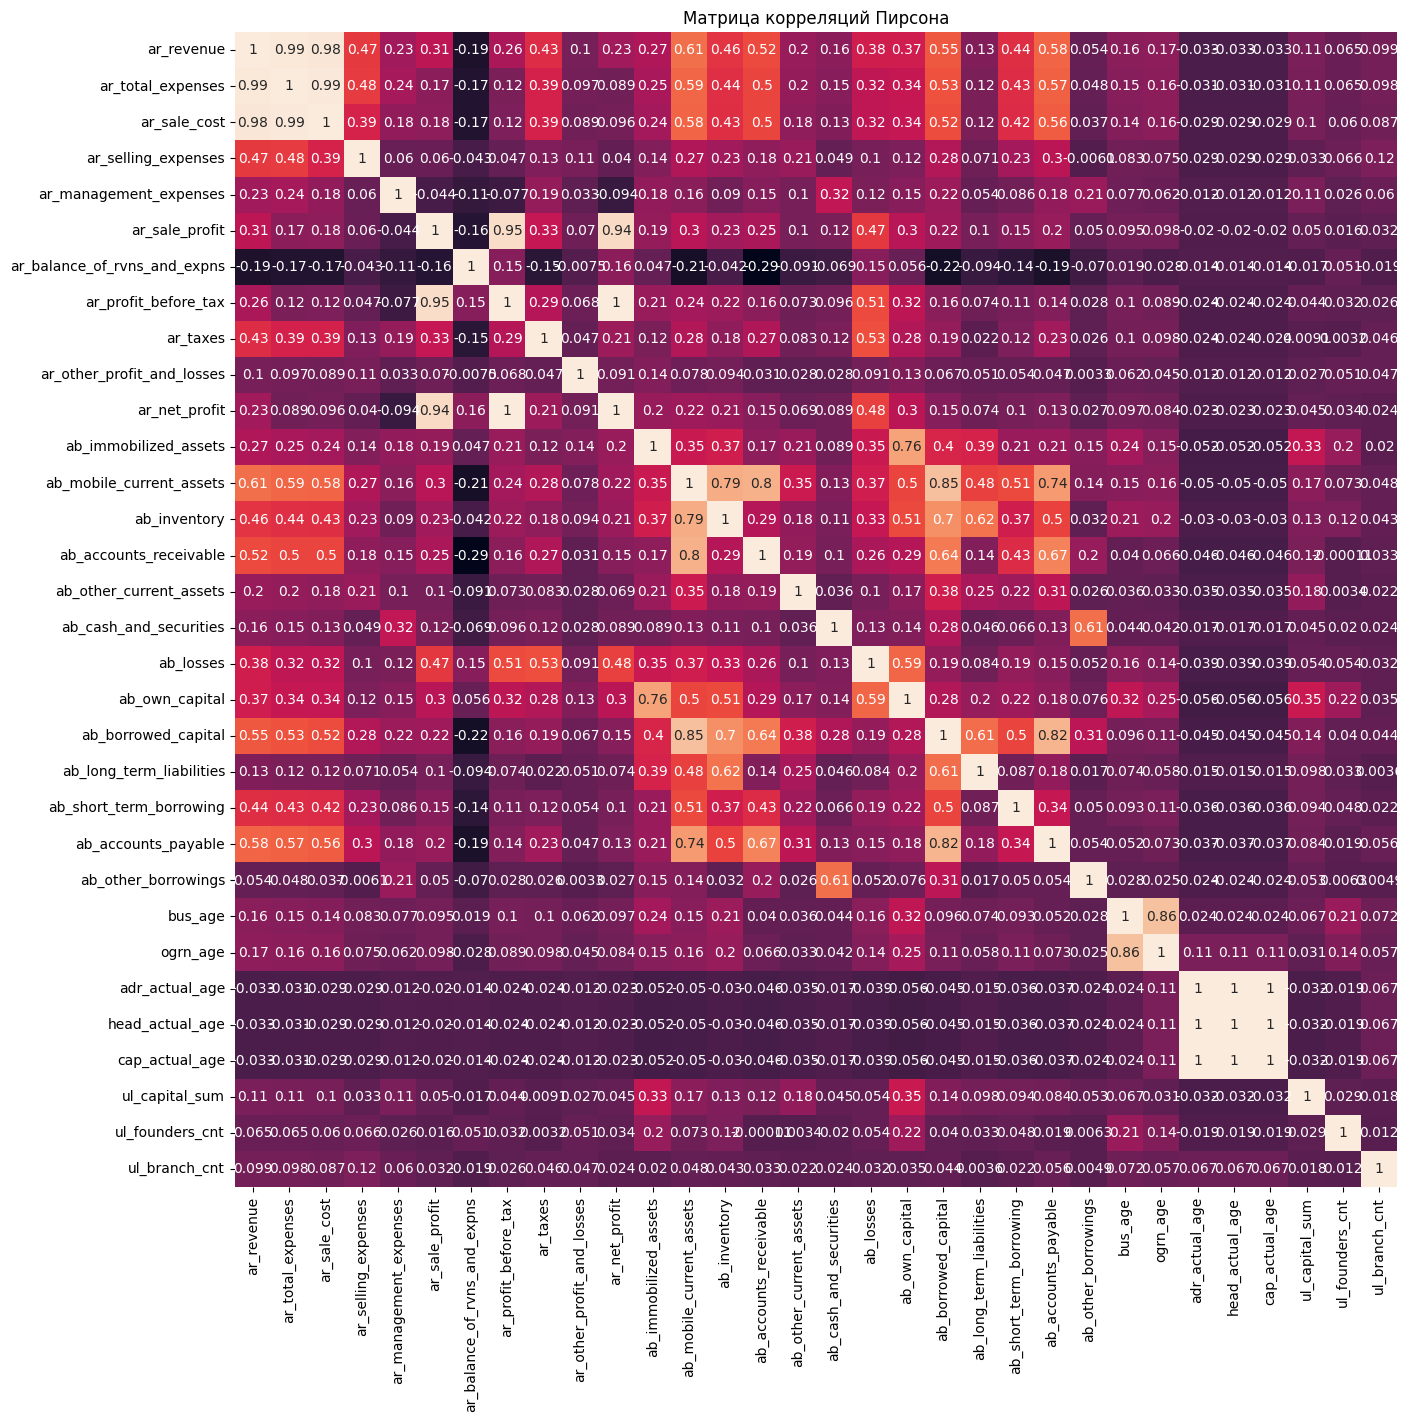

In [46]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data[NUM_FEATURES].corr(method='pearson'), annot=True, cbar=False, ax=ax)
ax.set(title='Матрица корреляций Пирсона')
plt.show()

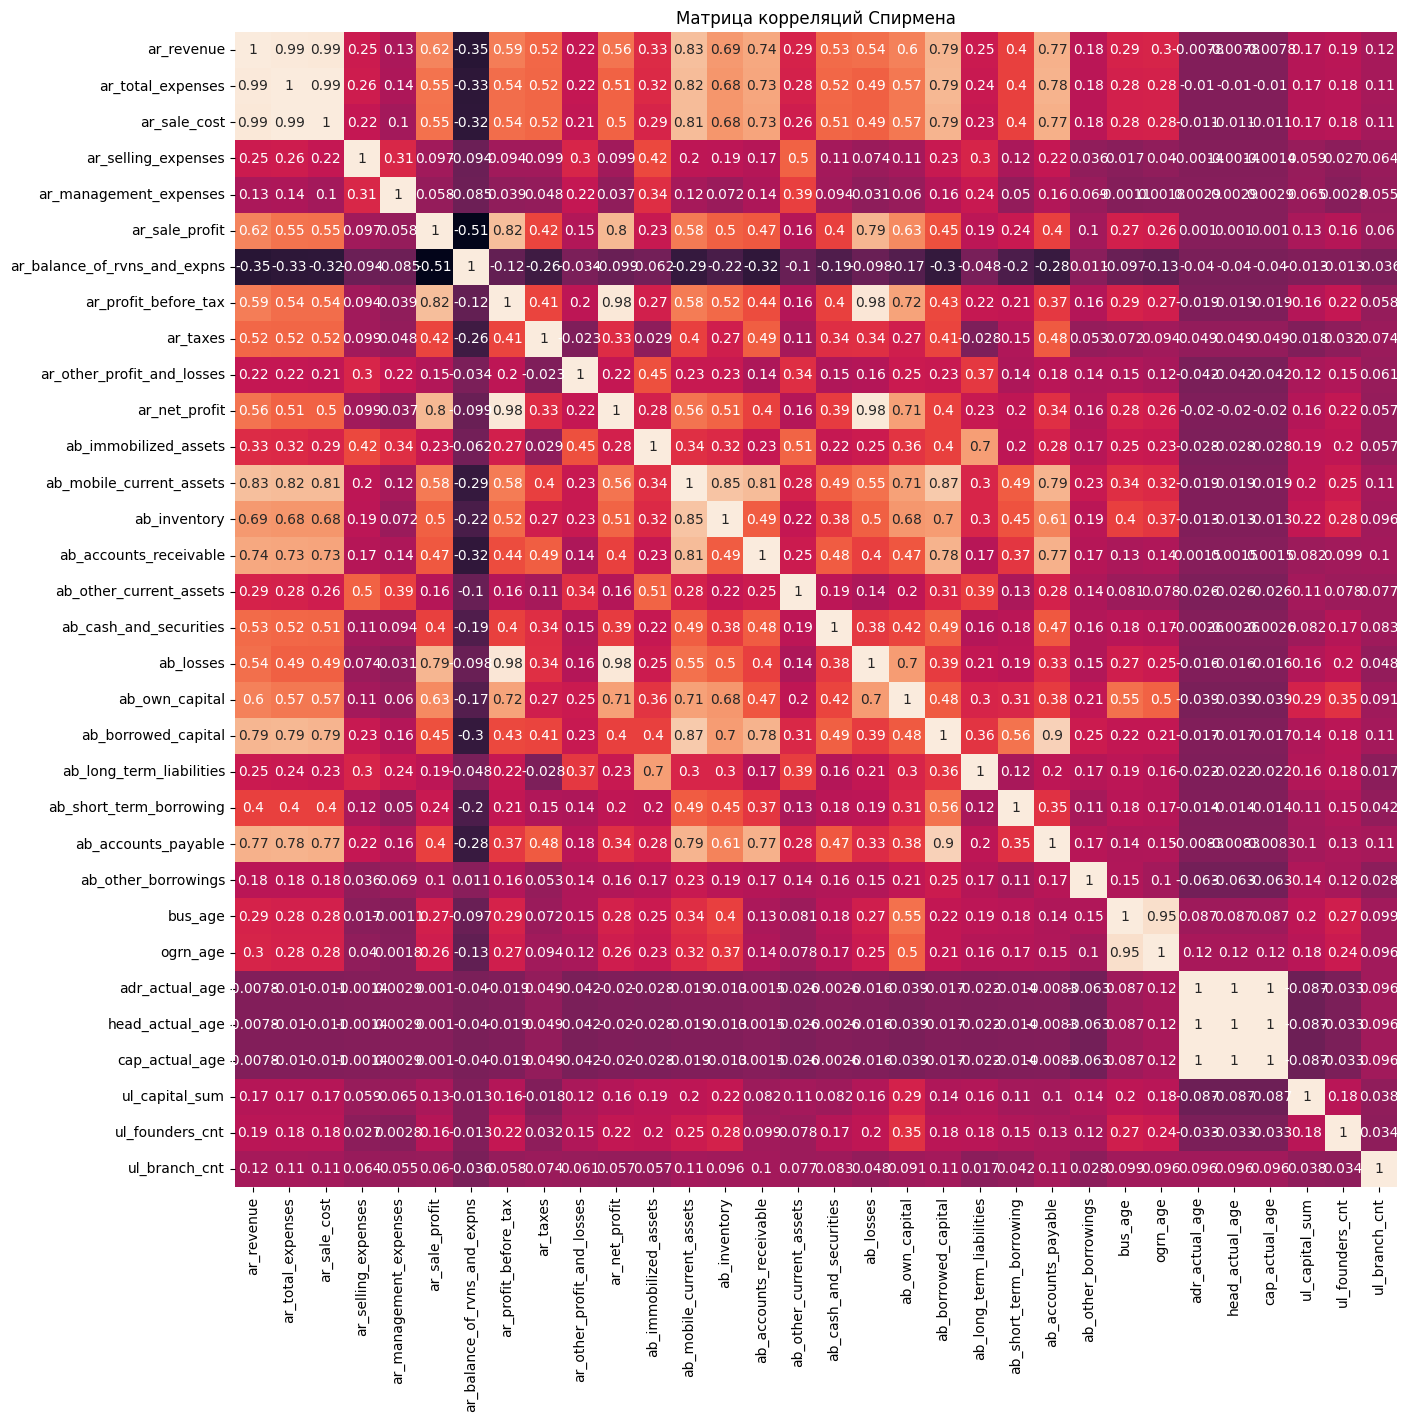

In [47]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data[NUM_FEATURES].corr(method='spearman'), annot=True, cbar=False, ax=ax)
ax.set(title='Матрица корреляций Спирмена')
plt.show()

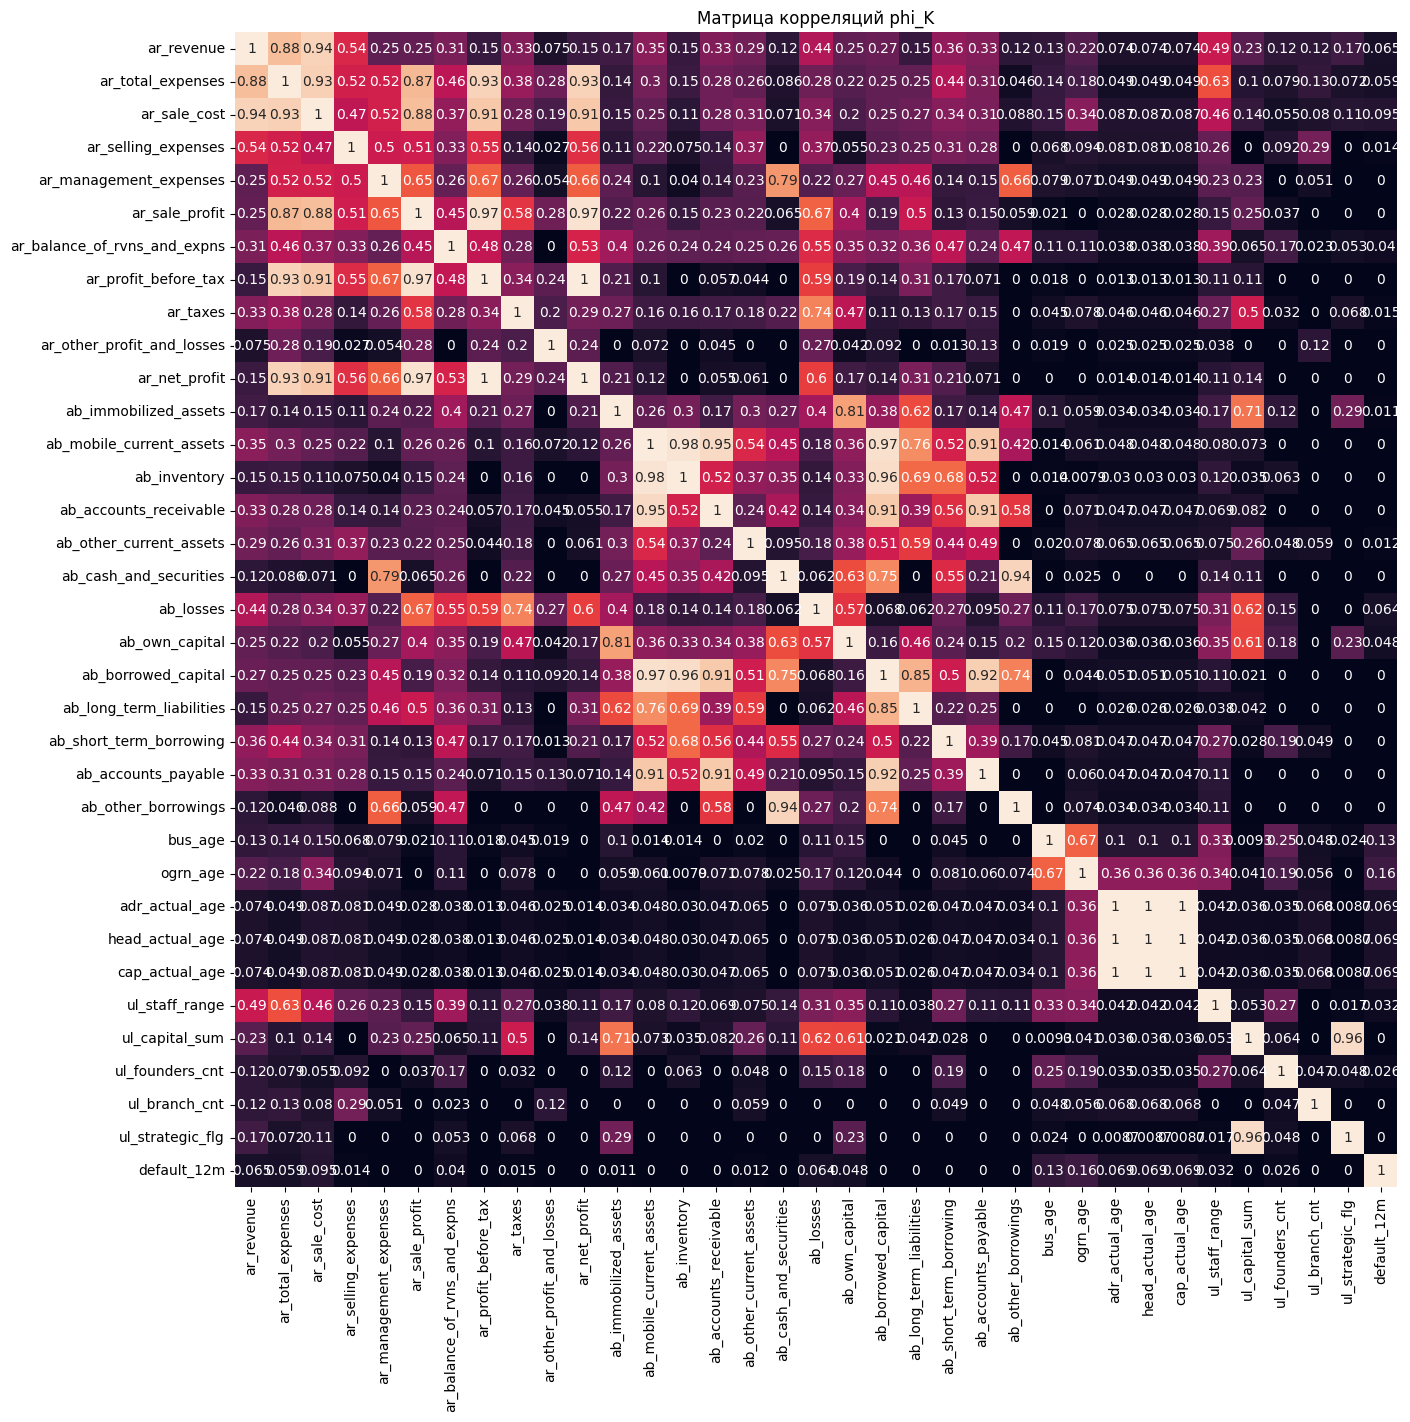

In [48]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(
    data.drop(columns='ul_systematizing_flg').phik_matrix(interval_cols=NUM_FEATURES), annot=True, cbar=False, ax=ax)
ax.set(title='Матрица корреляций phi_K')
plt.show()

E:\Projects\Test Tasks\PD competition\venv\Lib\site-packages\matplotlib\colors.py:1354: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
E:\Projects\Test Tasks\PD competition\venv\Lib\site-packages\matplotlib\colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


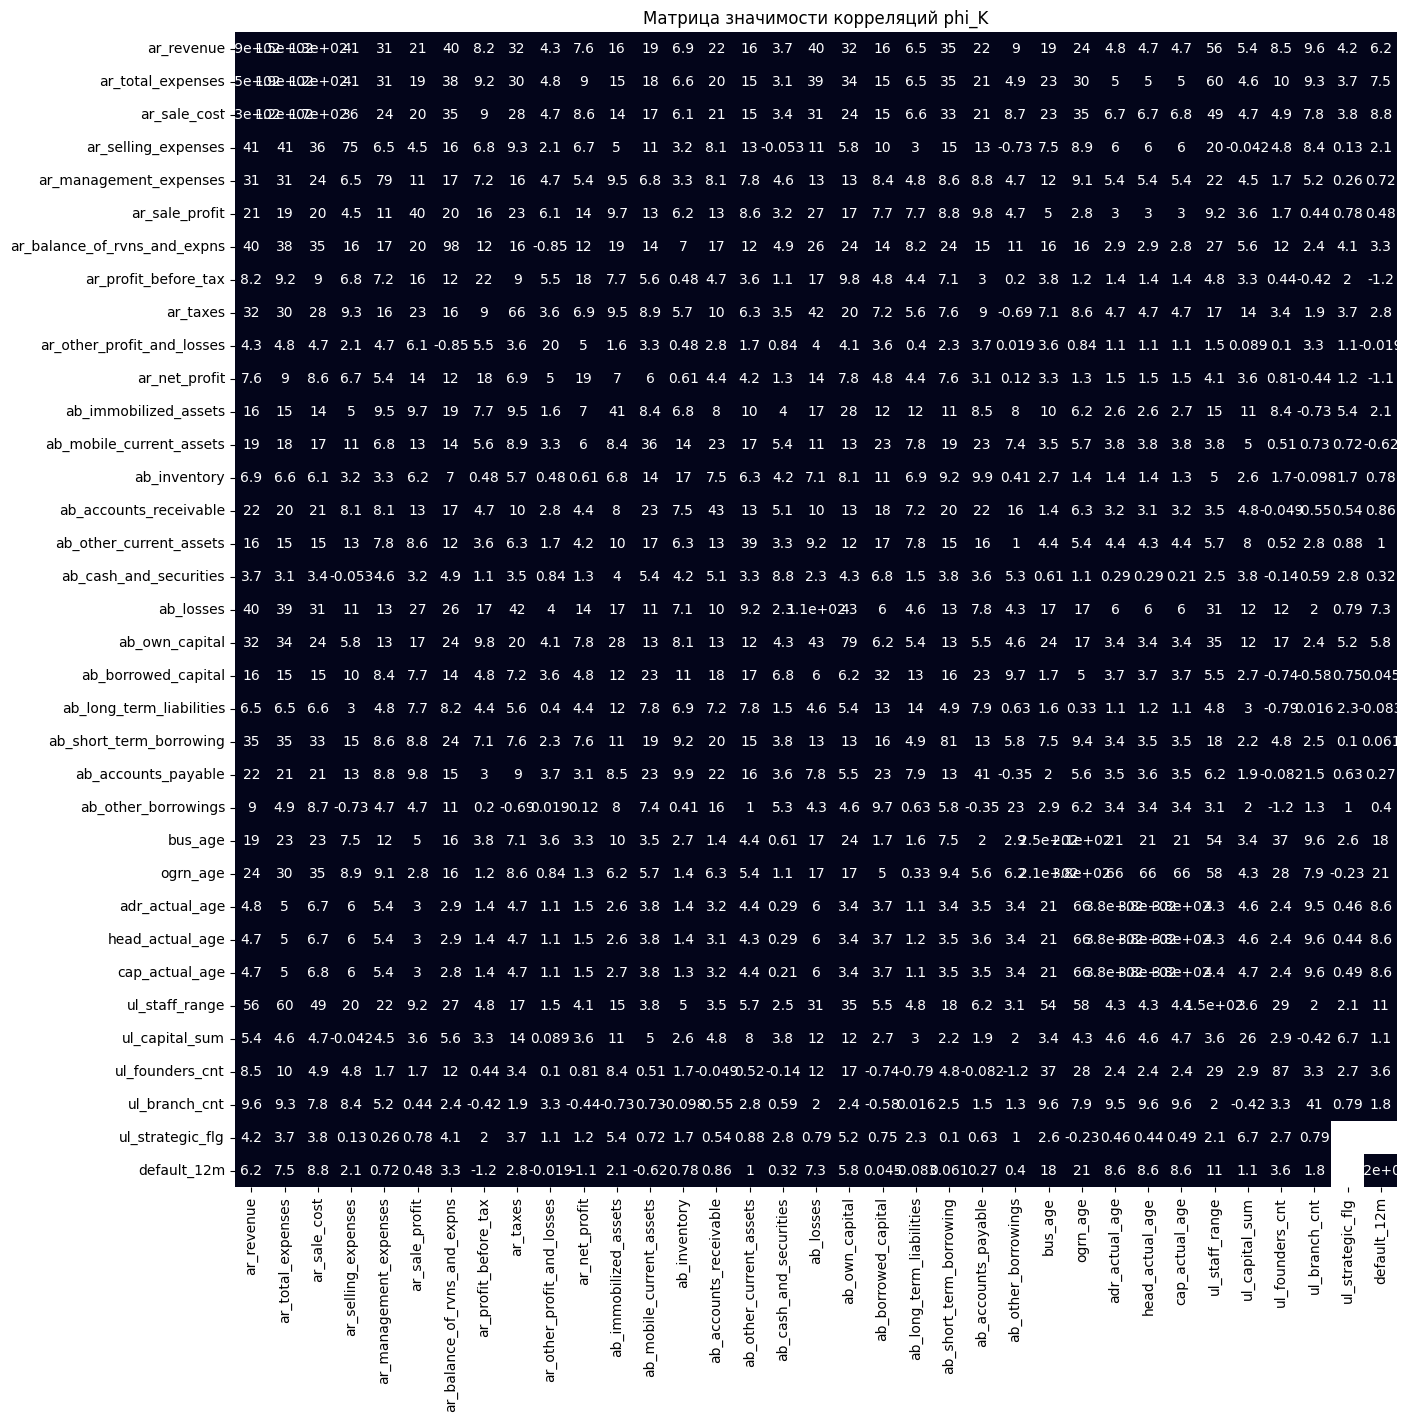

In [49]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(
    data.drop(columns='ul_systematizing_flg').significance_matrix(interval_cols=NUM_FEATURES),
    annot=True,
    cbar=False,
    ax=ax,
)
ax.set(title='Матрица значимости корреляций phi_K')
plt.show()

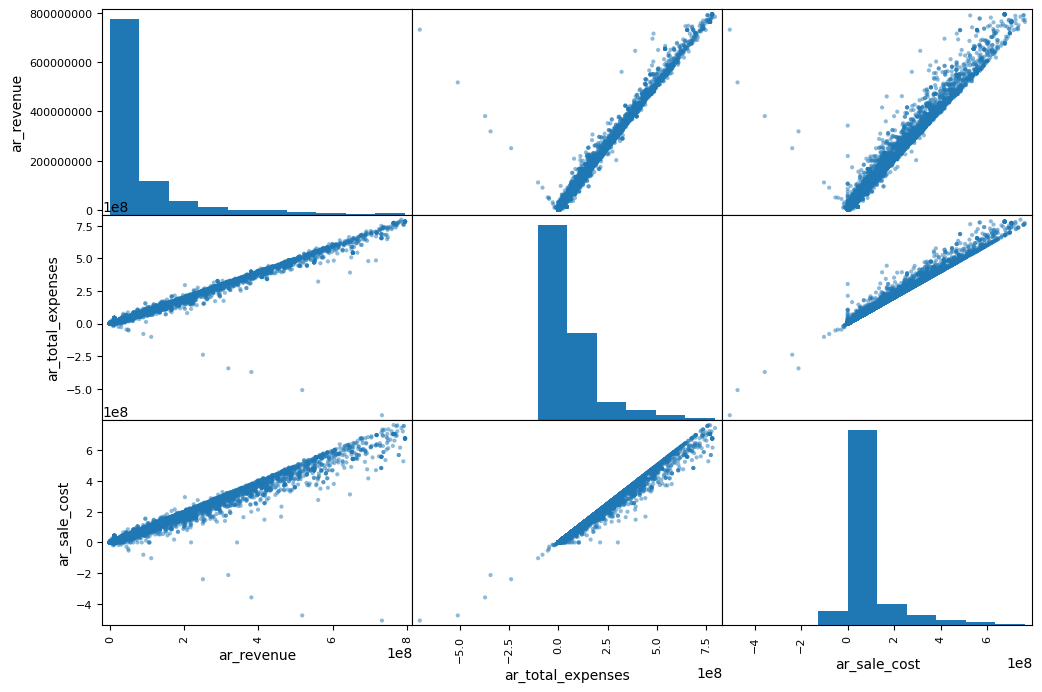

In [149]:
_ = pd.plotting.scatter_matrix(data[['ar_revenue', 'ar_total_expenses', 'ar_sale_cost']], figsize=(12, 8))

# Модельки

[к навигации](#Навигация)

In [151]:
from typing import Dict

import optuna
from optuna.samplers import TPESampler
optuna.logging.set_verbosity(optuna.logging.WARNING)
import lightgbm

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import PCA

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report

import my_ds_tools

In [161]:
FEATURES_TO_DROP = [
    'ul_systematizing_flg',  # константаная фича
    'ul_strategic_flg',  # квазиконстантная фича (3 отличных примера)
    'head_actual_age',  # полная корреляция с 'adr_actual_age'
    'cap_actual_age',  # полная корреляция с 'adr_actual_age'
]
FEATURES_TO_ABS = [
    'ar_total_expenses',
    'ar_sale_cost',
]
FEATURES_TO_PCA = [
    'bus_age',
    'ogrn_age',
    'adr_actual_age',
    
    'ul_capital_sum',
    'ul_founders_cnt',
    'ul_branch_cnt',
]

In [53]:
y = data['default_12m']
X = data.drop(columns='default_12m')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, stratify=y, random_state=RANDOM_STATE)

## DecisionTreeClassifier

[к навигации](#Навигация)

In [167]:
def objective(trial: optuna.trial.Trial):
    """Целевая функция для оптимизации гиперпараметров."""
    model = get_model(trial, mode='fit')
    scores = cross_val_score(
        estimator=model,
        X=X,
        y=y,
        scoring='roc_auc',
        cv=StratifiedShuffleSplit(n_splits=N_SPLITS, random_state=RANDOM_STATE),
    )

    return scores.mean()


def get_model(trial: optuna.trial.Trial, mode: str) -> Pipeline:

    step_0 = ColumnTransformer(
        transformers=[
            ('drop', 'drop', FEATURES_TO_DROP),
            ('TE', OneHotEncoder(sparse_output=False), ['ul_staff_range']),
        ],
        remainder='passthrough',
        verbose_feature_names_out=False,
    ).set_output(transform='pandas')

    pca = PCA(n_components=trial.suggest_float('n_components', .01, .99, step=.01), random_state=RANDOM_STATE)

    step_1 = ColumnTransformer(
        transformers=[
            ('PCA', pca, FEATURES_TO_PCA),
        ],
        remainder='passthrough',
        verbose_feature_names_out=False,
    ).set_output(transform='pandas')

    preprocessing = Pipeline([
        ('step_0', step_0),
        ('step_1', step_1),
    ])

    decision_tree = DecisionTreeClassifier(**get_init_hyperparams(trial, mode))

    model = Pipeline([
        ('preprocessing', preprocessing),
        ('tree', decision_tree),
    ])

    return model


def get_init_hyperparams(trial: optuna.trial.Trial, mode: str) -> Dict:
    if mode == 'fit':
        criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])
        max_depth = trial.suggest_int('max_depth', 1, 15)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 100)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 100)
        min_weight_fraction_leaf = trial.suggest_float('min_weight_fraction_leaf', 1e-5, .1, step=1e-5)
        max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 2, 20)
        min_impurity_decrease = trial.suggest_float('min_impurity_decrease', 1e-7, 1e-3, step=1e-7)
    elif mode == 'refit':
        criterion = trial.params['criterion']
        max_depth = trial.params['max_depth']
        min_samples_split = trial.params['min_samples_split']
        min_samples_leaf = trial.params['min_samples_leaf']
        min_weight_fraction_leaf = trial.params['min_weight_fraction_leaf']
        max_leaf_nodes = trial.params['max_leaf_nodes']
        min_impurity_decrease = trial.params['min_impurity_decrease']
    else:
        assert False, 'ABOBA'

    hyperparams = dict(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        min_weight_fraction_leaf=min_weight_fraction_leaf,
        min_impurity_decrease=min_impurity_decrease,
        max_leaf_nodes=max_leaf_nodes,
        random_state=RANDOM_STATE,
        class_weight='balanced',
    )

    return hyperparams

In [168]:
%%time
study = optuna.create_study(
    sampler=TPESampler(seed=RANDOM_STATE),
    direction='maximize',
    study_name='decision_tree',
)
study.optimize(objective, n_trials=N_TRIALS, show_progress_bar=True)

  0%|          | 0/100 [00:00<?, ?it/s]

CPU times: total: 8min 11s
Wall time: 8min 58s


In [169]:
print('Лучшие гиперпараметры:')
for hyperparam, value in study.best_trial.params.items():
    print(f'* {hyperparam}: {value}')
print(f'Лучший mean AUC-ROC: {study.best_trial.value}')  # 0.6654292407483122

Лучшие гиперпараметры:
* n_components: 0.44
* criterion: log_loss
* max_depth: 11
* min_samples_split: 88
* min_samples_leaf: 20
* min_weight_fraction_leaf: 0.0112
* max_leaf_nodes: 13
* min_impurity_decrease: 0.0001874
Лучший mean AUC-ROC: 0.6328943027314244


In [170]:
model = get_model(study.best_trial, mode='refit')
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('step_0',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('drop',
                                                                   'drop',
                                                                   ['ul_systematizing_flg',
                                                                    'ul_strategic_flg',
                                                                    'head_actual_age',
                                                                    'cap_actual_age']),
                                                                  ('TE',
                                                                   OneHotEncoder(sparse_output=False),
                                                                   ['ul_staff_range'])],
                                                    verbose_feature_names_out=False)),
                                 ('step_1',
                                  ColumnTransformer(remainder='passt...
                                                                    'ogrn_age',
                                                                    'adr_actual_age',
                                                                    'ul_capital_sum',
                                                                    'ul_founders_cnt',
                                                                    'ul_branch_cnt'])],
                                                    verbose_feature_names_out=False))])),
                ('tree',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='log_loss', max_depth=11,
                                        max_leaf_nodes=13,
                                        min_impurity_decrease=0.0001874,
                                        min_samples_leaf=20,
                                        min_samples_split=88,
                                        min_weight_fraction_leaf=0.0112,
                                        random_state=42))])

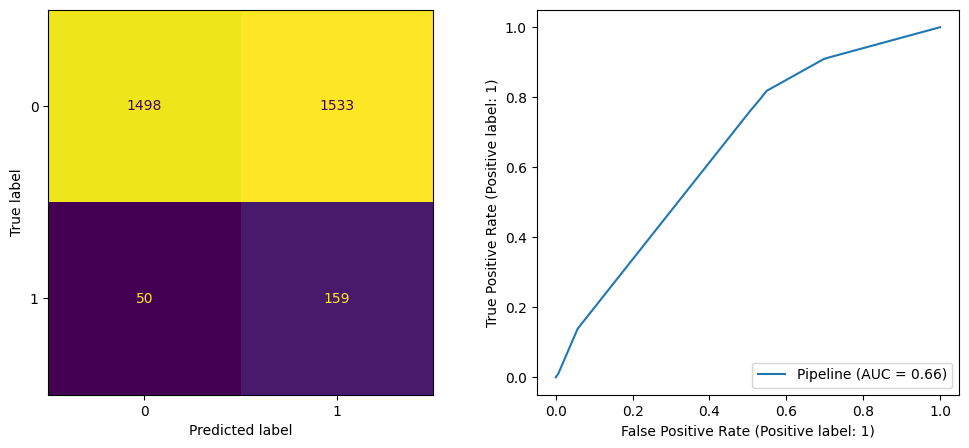

              precision    recall  f1-score   support

           0       0.97      0.49      0.65      3031
           1       0.09      0.76      0.17       209

    accuracy                           0.51      3240
   macro avg       0.53      0.63      0.41      3240
weighted avg       0.91      0.51      0.62      3240



In [171]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, colorbar=False, ax=axes[0])
RocCurveDisplay.from_estimator(model, X_test, y_test, ax=axes[1])
plt.show()

print(classification_report(y_test, model.predict(X_test)))

## LightGBMClassifier

[к навигации](#Навигация)

In [137]:
def get_model(trial: optuna.trial.Trial, mode: str) -> Pipeline:
    preprocessing = ColumnTransformer(
        transformers=[
            ('drop', 'drop', FEATURES_TO_DROP),
            ('as_category', my_ds_tools.custom_column_transformers.AsCategory({'ul_staff_range': ['(100-500]', '> 500', '[1-100]']}), ['ul_staff_range']),
            ('abs', my_ds_tools.custom_column_transformers.ABS(), FEATURES_TO_ABS),
        ],
        remainder='passthrough',
        verbose_feature_names_out=False,
    ).set_output(transform='pandas')

    lgbm = lightgbm.LGBMClassifier(**get_init_hyperparams(trial, mode))

    model = Pipeline([
        ('preprocessing', preprocessing),
        ('LGBM', lgbm),
    ])

    return model


def get_init_hyperparams(trial: optuna.trial.Trial, mode: str) -> Dict:
    if mode == 'fit':
        # Core Parameters
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        num_leaves = trial.suggest_int('num_leaves', 2, 6)

        # Learning Control Parameters
        max_depth = trial.suggest_int('max_depth', 1, 3)
        min_child_samples = trial.suggest_int('min_child_samples', 20, 50)
        reg_alpha = trial.suggest_float('reg_alpha', .5, 2)
        reg_lambda = trial.suggest_float('reg_lambda', .5, 2)

        min_split_gain = trial.suggest_float('min_split_gain', .01, 1.)
    elif mode == 'refit':
        # Core Parameters
        n_estimators = trial.params['n_estimators']
        num_leaves = trial.params['num_leaves']

        # Learning Control Parameters
        max_depth = trial.params['max_depth']
        min_child_samples = trial.params['min_child_samples']
        reg_alpha = trial.params['reg_alpha']
        reg_lambda = trial.params['reg_lambda']

        min_split_gain = trial.params['min_split_gain']
    else:
        assert False, 'ABOBA'

    hyperparams = dict(
        # Core Parameters
        objective='binary',
        boosting_type='gbdt',
        n_estimators=n_estimators,
        learning_rate=.05,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        num_leaves=num_leaves,
        n_jobs=-1,
        random_state=RANDOM_STATE,

        # Learning Control Parameters
        max_depth=max_depth,
        min_child_samples=min_child_samples,
        min_split_gain=min_split_gain,

        # Objective Parameters
        is_unbalance=True,
        
        verbose=-1,
    )

    return hyperparams

In [138]:
%%time
study = optuna.create_study(
    sampler=TPESampler(seed=RANDOM_STATE),
    direction='maximize',
    study_name='decision_tree',
)
study.optimize(objective, n_trials=N_TRIALS, show_progress_bar=True)

  0%|          | 0/100 [00:00<?, ?it/s]

In [139]:
print('Лучшие гиперпараметры:')
for hyperparam, value in study.best_trial.params.items():
    print(f'* {hyperparam}: {value}')
print(f'Лучший mean AUC-ROC: {study.best_trial.value}')

Лучшие гиперпараметры:
* n_estimators: 266
* num_leaves: 6
* max_depth: 3
* min_child_samples: 47
* reg_alpha: 1.8891431798868852
* reg_lambda: 1.9698467479376796
* min_split_gain: 0.07238534804289289
Лучший mean AUC-ROC: 0.7080613564143404


In [140]:
model = get_model(study.best_trial, mode='refit')
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['ul_systematizing_flg',
                                                   'ul_strategic_flg',
                                                   'head_actual_age',
                                                   'cap_actual_age']),
                                                 ('as_category',
                                                  AsCategory(dict_with_categories={'ul_staff_range': ['(100-500]',
                                                                                                      '> '
                                                                                                      '500',
                                                                                                      '[1-100]']}),
                                                  ['ul_staff_range']),
                                                 ('abs', ABS(),
                                                  ['ar_total_expenses',
                                                   'ar_sale_cost'])],
                                   verbose_feature_names_out=False)),
                ('LGBM',
                 LGBMClassifier(is_unbalance=True, learning_rate=0.05,
                                max_depth=3, min_child_samples=47,
                                min_split_gain=0.07238534804289289,
                                n_estimators=266, n_jobs=-1, num_leaves=6,
                                objective='binary', random_state=42,
                                reg_alpha=1.8891431798868852,
                                reg_lambda=1.9698467479376796, verbose=-1))])

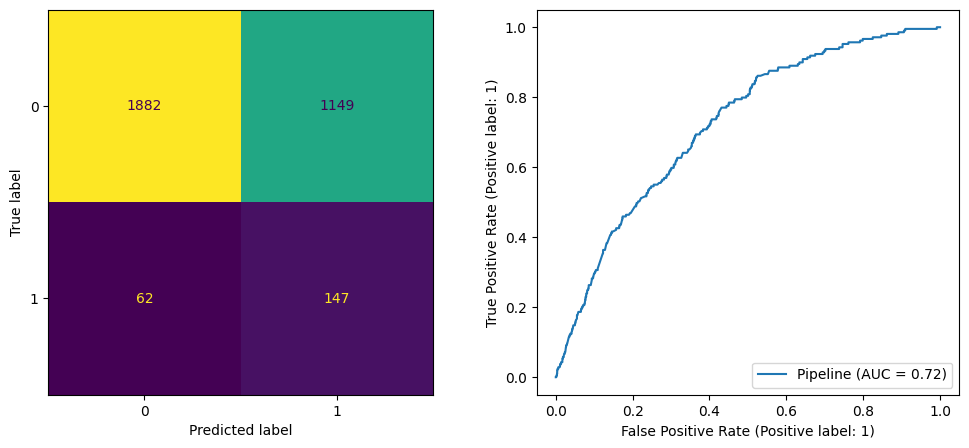

              precision    recall  f1-score   support

           0       0.97      0.62      0.76      3031
           1       0.11      0.70      0.20       209

    accuracy                           0.63      3240
   macro avg       0.54      0.66      0.48      3240
weighted avg       0.91      0.63      0.72      3240



In [141]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, colorbar=False, ax=axes[0])
RocCurveDisplay.from_estimator(model, X_test, y_test, ax=axes[1])
plt.show()

print(classification_report(y_test, model.predict(X_test)))